In [168]:
import numpy as np
from math import exp
from random import seed
from random import random
import matplotlib.pyplot as plt
# Base class
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate, alpha = 0):
        raise NotImplementedError

In [273]:

# inherit from base class Layer
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size, offset = 1):
        self.previous_change = np.zeros((input_size, output_size))
        self.weights = (np.random.rand(input_size, output_size) - 0.5) * offset
        self.bias = (np.random.rand(1, output_size) - 0.5) * offset

    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def backward_propagation(self, output_error, learning_rate, alpha):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # dBias = output_error

        # update parameters
        self.weights = self.weights - (learning_rate * weights_error) + (alpha * self.previous_change) 
        self.bias -= learning_rate * output_error
        self.previous_change = -(learning_rate * weights_error)
        return input_error
    

# inherit from base class Layer
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    # learning_rate is not used because there is no "learnable" parameters.
    def backward_propagation(self, output_error, learning_rate, alpha):
        return self.activation_prime(self.input) * output_error
    
    

def sigmoid(x):
    return 1/(1+np.exp(-x))


# Calculate the derivative of an neuron output
def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))  

def step(x):
    return np.where(x>0, 1,0)

def step_prime(x):
    return 0


# loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

def tanh(x):
    return np.tanh(x);

def tanh_prime(x):
    return 1-np.tanh(x)**2;

In [286]:
class NeuralNet:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result
    
    def predict_hidden(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            output = self.layers[0].forward_propagation(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate, alpha):
        # sample dimension first
        samples = len(x_train)
        epoch_error = []
        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate, alpha)

            # calculate average error on all samples
            err /= samples
            epoch_error.append(err)
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))
        return epoch_error

In [287]:
A = np.random.rand(1000,10)
origin = np.where(A > 0.5, 1, -1)
form = [[i] for i in origin]

data = np.array(form)
targets = np.sum(origin, 1)
targets =  np.where(targets>0, 1,0)
targets = np.array([[[i]] for i in targets])

x_train = data[0:800, ]
y_train = targets[0:800, ]
x_test = data[801:1000]
x_train = targets[801:1000]



epoch 1/10   error=0.034574
epoch 2/10   error=0.003845
epoch 3/10   error=0.002371
epoch 4/10   error=0.001708
epoch 5/10   error=0.001331
epoch 6/10   error=0.001089
epoch 7/10   error=0.000921
epoch 8/10   error=0.000797
epoch 9/10   error=0.000702
epoch 10/10   error=0.000627


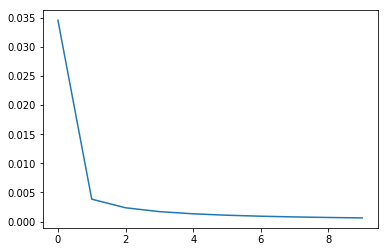

In [288]:
net = NeuralNet()
net.add(FCLayer(10, 1, offset = 5))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.use(mse, mse_prime)
epoch_error0 = net.fit(data, targets, epochs=10, learning_rate=0.5, alpha=0)

plt.plot(epoch_error0)

epoch 1/1000   error=0.417404
epoch 2/1000   error=0.345662
epoch 3/1000   error=0.343347
epoch 4/1000   error=0.342879
epoch 5/1000   error=0.342612
epoch 6/1000   error=0.342379
epoch 7/1000   error=0.342156
epoch 8/1000   error=0.341942
epoch 9/1000   error=0.341735
epoch 10/1000   error=0.341535
epoch 11/1000   error=0.341342
epoch 12/1000   error=0.341155
epoch 13/1000   error=0.340975
epoch 14/1000   error=0.340801
epoch 15/1000   error=0.340633
epoch 16/1000   error=0.340470
epoch 17/1000   error=0.340313
epoch 18/1000   error=0.340161
epoch 19/1000   error=0.340014
epoch 20/1000   error=0.339871
epoch 21/1000   error=0.339732
epoch 22/1000   error=0.339597
epoch 23/1000   error=0.339466
epoch 24/1000   error=0.339338
epoch 25/1000   error=0.339213
epoch 26/1000   error=0.339091
epoch 27/1000   error=0.338972
epoch 28/1000   error=0.338855
epoch 29/1000   error=0.338740
epoch 30/1000   error=0.338627
epoch 31/1000   error=0.338515
epoch 32/1000   error=0.338405
epoch 33/1000   e

epoch 571/1000   error=0.008261
epoch 572/1000   error=0.008175
epoch 573/1000   error=0.008090
epoch 574/1000   error=0.008007
epoch 575/1000   error=0.007925
epoch 576/1000   error=0.007845
epoch 577/1000   error=0.007766
epoch 578/1000   error=0.007688
epoch 579/1000   error=0.007612
epoch 580/1000   error=0.007537
epoch 581/1000   error=0.007463
epoch 582/1000   error=0.007390
epoch 583/1000   error=0.007319
epoch 584/1000   error=0.007249
epoch 585/1000   error=0.007179
epoch 586/1000   error=0.007111
epoch 587/1000   error=0.007044
epoch 588/1000   error=0.006978
epoch 589/1000   error=0.006913
epoch 590/1000   error=0.006850
epoch 591/1000   error=0.006787
epoch 592/1000   error=0.006725
epoch 593/1000   error=0.006664
epoch 594/1000   error=0.006604
epoch 595/1000   error=0.006544
epoch 596/1000   error=0.006486
epoch 597/1000   error=0.006429
epoch 598/1000   error=0.006372
epoch 599/1000   error=0.006316
epoch 600/1000   error=0.006262
epoch 601/1000   error=0.006207
epoch 60

epoch 875/1000   error=0.001569
epoch 876/1000   error=0.001564
epoch 877/1000   error=0.001559
epoch 878/1000   error=0.001555
epoch 879/1000   error=0.001550
epoch 880/1000   error=0.001545
epoch 881/1000   error=0.001540
epoch 882/1000   error=0.001536
epoch 883/1000   error=0.001531
epoch 884/1000   error=0.001526
epoch 885/1000   error=0.001522
epoch 886/1000   error=0.001517
epoch 887/1000   error=0.001512
epoch 888/1000   error=0.001508
epoch 889/1000   error=0.001503
epoch 890/1000   error=0.001499
epoch 891/1000   error=0.001494
epoch 892/1000   error=0.001490
epoch 893/1000   error=0.001485
epoch 894/1000   error=0.001481
epoch 895/1000   error=0.001476
epoch 896/1000   error=0.001472
epoch 897/1000   error=0.001468
epoch 898/1000   error=0.001463
epoch 899/1000   error=0.001459
epoch 900/1000   error=0.001455
epoch 901/1000   error=0.001451
epoch 902/1000   error=0.001446
epoch 903/1000   error=0.001442
epoch 904/1000   error=0.001438
epoch 905/1000   error=0.001434
epoch 90

epoch 210/1000   error=0.017462
epoch 211/1000   error=0.015896
epoch 212/1000   error=0.014600
epoch 213/1000   error=0.013504
epoch 214/1000   error=0.012565
epoch 215/1000   error=0.011752
epoch 216/1000   error=0.011037
epoch 217/1000   error=0.010406
epoch 218/1000   error=0.009843
epoch 219/1000   error=0.009338
epoch 220/1000   error=0.008882
epoch 221/1000   error=0.008469
epoch 222/1000   error=0.008091
epoch 223/1000   error=0.007745
epoch 224/1000   error=0.007429
epoch 225/1000   error=0.007136
epoch 226/1000   error=0.006863
epoch 227/1000   error=0.006614
epoch 228/1000   error=0.006379
epoch 229/1000   error=0.006158
epoch 230/1000   error=0.005957
epoch 231/1000   error=0.005766
epoch 232/1000   error=0.005579
epoch 233/1000   error=0.005416
epoch 234/1000   error=0.005263
epoch 235/1000   error=0.005093
epoch 236/1000   error=0.004961
epoch 237/1000   error=0.004850
epoch 238/1000   error=0.004675
epoch 239/1000   error=0.004561
epoch 240/1000   error=0.004536
epoch 24

epoch 508/1000   error=0.008661
epoch 509/1000   error=0.007570
epoch 510/1000   error=0.006162
epoch 511/1000   error=0.003702
epoch 512/1000   error=0.001744
epoch 513/1000   error=0.000496
epoch 514/1000   error=0.001231
epoch 515/1000   error=0.004056
epoch 516/1000   error=0.006713
epoch 517/1000   error=0.008292
epoch 518/1000   error=0.007993
epoch 519/1000   error=0.007133
epoch 520/1000   error=0.005083
epoch 521/1000   error=0.003193
epoch 522/1000   error=0.001121
epoch 523/1000   error=0.000437
epoch 524/1000   error=0.001810
epoch 525/1000   error=0.004396
epoch 526/1000   error=0.007024
epoch 527/1000   error=0.007927
epoch 528/1000   error=0.007897
epoch 529/1000   error=0.006530
epoch 530/1000   error=0.005065
epoch 531/1000   error=0.002799
epoch 532/1000   error=0.001160
epoch 533/1000   error=0.000475
epoch 534/1000   error=0.001563
epoch 535/1000   error=0.004282
epoch 536/1000   error=0.006532
epoch 537/1000   error=0.007824
epoch 538/1000   error=0.007517
epoch 53

epoch 835/1000   error=0.076118
epoch 836/1000   error=0.085549
epoch 837/1000   error=0.074375
epoch 838/1000   error=0.083101
epoch 839/1000   error=0.072594
epoch 840/1000   error=0.080642
epoch 841/1000   error=0.070771
epoch 842/1000   error=0.078163
epoch 843/1000   error=0.068900
epoch 844/1000   error=0.075655
epoch 845/1000   error=0.066973
epoch 846/1000   error=0.073105
epoch 847/1000   error=0.064981
epoch 848/1000   error=0.070501
epoch 849/1000   error=0.062910
epoch 850/1000   error=0.067825
epoch 851/1000   error=0.060744
epoch 852/1000   error=0.065054
epoch 853/1000   error=0.058461
epoch 854/1000   error=0.062160
epoch 855/1000   error=0.056030
epoch 856/1000   error=0.059105
epoch 857/1000   error=0.053410
epoch 858/1000   error=0.055835
epoch 859/1000   error=0.050543
epoch 860/1000   error=0.052275
epoch 861/1000   error=0.047344
epoch 862/1000   error=0.048316
epoch 863/1000   error=0.043685
epoch 864/1000   error=0.043796
epoch 865/1000   error=0.039378
epoch 86

epoch 354/1000   error=0.159349
epoch 355/1000   error=0.158360
epoch 356/1000   error=0.157346
epoch 357/1000   error=0.156305
epoch 358/1000   error=0.155236
epoch 359/1000   error=0.154138
epoch 360/1000   error=0.153011
epoch 361/1000   error=0.151854
epoch 362/1000   error=0.150665
epoch 363/1000   error=0.149445
epoch 364/1000   error=0.148192
epoch 365/1000   error=0.146905
epoch 366/1000   error=0.145583
epoch 367/1000   error=0.144227
epoch 368/1000   error=0.142834
epoch 369/1000   error=0.141405
epoch 370/1000   error=0.139937
epoch 371/1000   error=0.138432
epoch 372/1000   error=0.136888
epoch 373/1000   error=0.135304
epoch 374/1000   error=0.133681
epoch 375/1000   error=0.132017
epoch 376/1000   error=0.130313
epoch 377/1000   error=0.128567
epoch 378/1000   error=0.126781
epoch 379/1000   error=0.124953
epoch 380/1000   error=0.123084
epoch 381/1000   error=0.121175
epoch 382/1000   error=0.119226
epoch 383/1000   error=0.117237
epoch 384/1000   error=0.115209
epoch 38

epoch 680/1000   error=0.001594
epoch 681/1000   error=0.001587
epoch 682/1000   error=0.001579
epoch 683/1000   error=0.001572
epoch 684/1000   error=0.001565
epoch 685/1000   error=0.001558
epoch 686/1000   error=0.001551
epoch 687/1000   error=0.001545
epoch 688/1000   error=0.001538
epoch 689/1000   error=0.001531
epoch 690/1000   error=0.001524
epoch 691/1000   error=0.001518
epoch 692/1000   error=0.001511
epoch 693/1000   error=0.001505
epoch 694/1000   error=0.001498
epoch 695/1000   error=0.001492
epoch 696/1000   error=0.001485
epoch 697/1000   error=0.001479
epoch 698/1000   error=0.001473
epoch 699/1000   error=0.001467
epoch 700/1000   error=0.001461
epoch 701/1000   error=0.001454
epoch 702/1000   error=0.001448
epoch 703/1000   error=0.001442
epoch 704/1000   error=0.001436
epoch 705/1000   error=0.001430
epoch 706/1000   error=0.001424
epoch 707/1000   error=0.001419
epoch 708/1000   error=0.001413
epoch 709/1000   error=0.001407
epoch 710/1000   error=0.001401
epoch 71

epoch 968/1000   error=0.000665
epoch 969/1000   error=0.000663
epoch 970/1000   error=0.000662
epoch 971/1000   error=0.000661
epoch 972/1000   error=0.000659
epoch 973/1000   error=0.000658
epoch 974/1000   error=0.000656
epoch 975/1000   error=0.000655
epoch 976/1000   error=0.000654
epoch 977/1000   error=0.000652
epoch 978/1000   error=0.000651
epoch 979/1000   error=0.000650
epoch 980/1000   error=0.000648
epoch 981/1000   error=0.000647
epoch 982/1000   error=0.000646
epoch 983/1000   error=0.000644
epoch 984/1000   error=0.000643
epoch 985/1000   error=0.000642
epoch 986/1000   error=0.000640
epoch 987/1000   error=0.000639
epoch 988/1000   error=0.000638
epoch 989/1000   error=0.000636
epoch 990/1000   error=0.000635
epoch 991/1000   error=0.000634
epoch 992/1000   error=0.000632
epoch 993/1000   error=0.000631
epoch 994/1000   error=0.000630
epoch 995/1000   error=0.000629
epoch 996/1000   error=0.000627
epoch 997/1000   error=0.000626
epoch 998/1000   error=0.000625
epoch 99

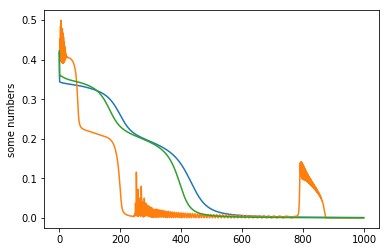

In [228]:
# training data
x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y_train = np.array([[[0]], [[1]], [[1]], [[0]]])

# NeuralNet0
net = NeuralNet()
net.add(FCLayer(2, 3))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.add(FCLayer(3, 1))
net.add(ActivationLayer(tanh, tanh_prime))
net.use(mse, mse_prime)
epoch_error0 = net.fit(x_train, y_train, epochs=1000, learning_rate=0.2, alpha=0)


# NeuralNet1
net = NeuralNet()
net.add(FCLayer(2, 3))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.add(FCLayer(3, 1))
net.add(ActivationLayer(tanh, tanh_prime))
net.use(mse, mse_prime)
epoch_error1 = net.fit(x_train, y_train, epochs=1000, learning_rate=0.6, alpha=0)


# NeuralNet2
net = NeuralNet()
net.add(FCLayer(2, 3))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.add(FCLayer(3, 1))
net.add(ActivationLayer(tanh, tanh_prime))
net.use(mse, mse_prime)
epoch_error2 = net.fit(x_train, y_train, epochs=1000, learning_rate=0.2, alpha=0.2)





# test
out = net.predict(x_train)
print(out)

plt.plot(epoch_error0)
plt.plot(epoch_error1)
plt.plot(epoch_error2)
plt.ylabel('some numbers')
plt.show()

In [325]:
# training data
x_train = np.array([[[1,0,0,0,0,0,0,0]], [[0,1,0,0,0,0,0,0]], [[0,0,1,0,0,0,0,0]], [[0,0,0,1,0,0,0,0]],
                    [[0,0,0,0,1,0,0,0]], [[0,0,0,0,0,1,0,0]],[[0,0,0,0,0,0,1,0]], [[0,0,0,0,0,0,0,1]]])

y_train = x_train


# NeuralNet
net = NeuralNet()
net.add(FCLayer(8, 3 ))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.add(FCLayer(3, 8 ))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.use(mse, mse_prime)
epoch_error0 = net.fit(x_train, y_train, epochs=3000, learning_rate=0.2, alpha = 0)


# NeuralNet
net = NeuralNet()
net.add(FCLayer(8, 3 ))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.add(FCLayer(3, 8 ))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.use(mse, mse_prime)
epoch_error1 = net.fit(x_train, y_train, epochs=3000, learning_rate=0.4, alpha = 0)


# NeuralNet
net = NeuralNet()
net.add(FCLayer(8, 3 ))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.add(FCLayer(3, 8 ))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.use(mse, mse_prime)
epoch_error2 = net.fit(x_train, y_train, epochs=3000, learning_rate=0.6, alpha = 0.5)

# NeuralNet
net = NeuralNet()
net.add(FCLayer(8, 3 ))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.add(FCLayer(3, 8 ))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.use(mse, mse_prime)
epoch_error3 = net.fit(x_train, y_train, epochs=3000, learning_rate=0.8, alpha = 0.8)

# NeuralNet
net = NeuralNet()
net.add(FCLayer(8, 3 ))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.add(FCLayer(3, 8 ))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.use(mse, mse_prime)
epoch_error4 = net.fit(x_train, y_train, epochs=3000, learning_rate=0.95, alpha = 0.8)






epoch 1/3000   error=0.243301
epoch 2/3000   error=0.232015
epoch 3/3000   error=0.221670
epoch 4/3000   error=0.212212
epoch 5/3000   error=0.203582
epoch 6/3000   error=0.195723
epoch 7/3000   error=0.188576
epoch 8/3000   error=0.182084
epoch 9/3000   error=0.176192
epoch 10/3000   error=0.170848
epoch 11/3000   error=0.166001
epoch 12/3000   error=0.161604
epoch 13/3000   error=0.157613
epoch 14/3000   error=0.153989
epoch 15/3000   error=0.150695
epoch 16/3000   error=0.147697
epoch 17/3000   error=0.144965
epoch 18/3000   error=0.142473
epoch 19/3000   error=0.140197
epoch 20/3000   error=0.138114
epoch 21/3000   error=0.136205
epoch 22/3000   error=0.134453
epoch 23/3000   error=0.132844
epoch 24/3000   error=0.131362
epoch 25/3000   error=0.129996
epoch 26/3000   error=0.128735
epoch 27/3000   error=0.127569
epoch 28/3000   error=0.126489
epoch 29/3000   error=0.125489
epoch 30/3000   error=0.124560
epoch 31/3000   error=0.123696
epoch 32/3000   error=0.122893
epoch 33/3000   e

epoch 395/3000   error=0.107146
epoch 396/3000   error=0.107139
epoch 397/3000   error=0.107131
epoch 398/3000   error=0.107124
epoch 399/3000   error=0.107116
epoch 400/3000   error=0.107109
epoch 401/3000   error=0.107101
epoch 402/3000   error=0.107094
epoch 403/3000   error=0.107086
epoch 404/3000   error=0.107079
epoch 405/3000   error=0.107071
epoch 406/3000   error=0.107063
epoch 407/3000   error=0.107056
epoch 408/3000   error=0.107048
epoch 409/3000   error=0.107040
epoch 410/3000   error=0.107033
epoch 411/3000   error=0.107025
epoch 412/3000   error=0.107017
epoch 413/3000   error=0.107009
epoch 414/3000   error=0.107002
epoch 415/3000   error=0.106994
epoch 416/3000   error=0.106986
epoch 417/3000   error=0.106978
epoch 418/3000   error=0.106970
epoch 419/3000   error=0.106962
epoch 420/3000   error=0.106954
epoch 421/3000   error=0.106947
epoch 422/3000   error=0.106939
epoch 423/3000   error=0.106931
epoch 424/3000   error=0.106923
epoch 425/3000   error=0.106914
epoch 42

epoch 783/3000   error=0.101957
epoch 784/3000   error=0.101936
epoch 785/3000   error=0.101914
epoch 786/3000   error=0.101893
epoch 787/3000   error=0.101872
epoch 788/3000   error=0.101850
epoch 789/3000   error=0.101829
epoch 790/3000   error=0.101807
epoch 791/3000   error=0.101786
epoch 792/3000   error=0.101764
epoch 793/3000   error=0.101742
epoch 794/3000   error=0.101721
epoch 795/3000   error=0.101699
epoch 796/3000   error=0.101677
epoch 797/3000   error=0.101655
epoch 798/3000   error=0.101633
epoch 799/3000   error=0.101611
epoch 800/3000   error=0.101589
epoch 801/3000   error=0.101567
epoch 802/3000   error=0.101545
epoch 803/3000   error=0.101523
epoch 804/3000   error=0.101501
epoch 805/3000   error=0.101479
epoch 806/3000   error=0.101456
epoch 807/3000   error=0.101434
epoch 808/3000   error=0.101412
epoch 809/3000   error=0.101389
epoch 810/3000   error=0.101367
epoch 811/3000   error=0.101344
epoch 812/3000   error=0.101322
epoch 813/3000   error=0.101299
epoch 81

epoch 1196/3000   error=0.090704
epoch 1197/3000   error=0.090675
epoch 1198/3000   error=0.090646
epoch 1199/3000   error=0.090617
epoch 1200/3000   error=0.090588
epoch 1201/3000   error=0.090559
epoch 1202/3000   error=0.090530
epoch 1203/3000   error=0.090502
epoch 1204/3000   error=0.090473
epoch 1205/3000   error=0.090444
epoch 1206/3000   error=0.090415
epoch 1207/3000   error=0.090386
epoch 1208/3000   error=0.090357
epoch 1209/3000   error=0.090328
epoch 1210/3000   error=0.090299
epoch 1211/3000   error=0.090270
epoch 1212/3000   error=0.090241
epoch 1213/3000   error=0.090212
epoch 1214/3000   error=0.090184
epoch 1215/3000   error=0.090155
epoch 1216/3000   error=0.090126
epoch 1217/3000   error=0.090097
epoch 1218/3000   error=0.090068
epoch 1219/3000   error=0.090039
epoch 1220/3000   error=0.090010
epoch 1221/3000   error=0.089982
epoch 1222/3000   error=0.089953
epoch 1223/3000   error=0.089924
epoch 1224/3000   error=0.089895
epoch 1225/3000   error=0.089866
epoch 1226

epoch 1626/3000   error=0.078512
epoch 1627/3000   error=0.078482
epoch 1628/3000   error=0.078453
epoch 1629/3000   error=0.078423
epoch 1630/3000   error=0.078393
epoch 1631/3000   error=0.078363
epoch 1632/3000   error=0.078334
epoch 1633/3000   error=0.078304
epoch 1634/3000   error=0.078274
epoch 1635/3000   error=0.078244
epoch 1636/3000   error=0.078214
epoch 1637/3000   error=0.078184
epoch 1638/3000   error=0.078154
epoch 1639/3000   error=0.078124
epoch 1640/3000   error=0.078094
epoch 1641/3000   error=0.078065
epoch 1642/3000   error=0.078035
epoch 1643/3000   error=0.078005
epoch 1644/3000   error=0.077975
epoch 1645/3000   error=0.077945
epoch 1646/3000   error=0.077914
epoch 1647/3000   error=0.077884
epoch 1648/3000   error=0.077854
epoch 1649/3000   error=0.077824
epoch 1650/3000   error=0.077794
epoch 1651/3000   error=0.077764
epoch 1652/3000   error=0.077734
epoch 1653/3000   error=0.077704
epoch 1654/3000   error=0.077673
epoch 1655/3000   error=0.077643
epoch 1656

epoch 2038/3000   error=0.064944
epoch 2039/3000   error=0.064910
epoch 2040/3000   error=0.064875
epoch 2041/3000   error=0.064840
epoch 2042/3000   error=0.064806
epoch 2043/3000   error=0.064771
epoch 2044/3000   error=0.064736
epoch 2045/3000   error=0.064702
epoch 2046/3000   error=0.064667
epoch 2047/3000   error=0.064632
epoch 2048/3000   error=0.064598
epoch 2049/3000   error=0.064563
epoch 2050/3000   error=0.064528
epoch 2051/3000   error=0.064494
epoch 2052/3000   error=0.064459
epoch 2053/3000   error=0.064424
epoch 2054/3000   error=0.064390
epoch 2055/3000   error=0.064355
epoch 2056/3000   error=0.064321
epoch 2057/3000   error=0.064286
epoch 2058/3000   error=0.064251
epoch 2059/3000   error=0.064217
epoch 2060/3000   error=0.064182
epoch 2061/3000   error=0.064147
epoch 2062/3000   error=0.064113
epoch 2063/3000   error=0.064078
epoch 2064/3000   error=0.064044
epoch 2065/3000   error=0.064009
epoch 2066/3000   error=0.063975
epoch 2067/3000   error=0.063940
epoch 2068

epoch 2308/3000   error=0.055899
epoch 2309/3000   error=0.055868
epoch 2310/3000   error=0.055836
epoch 2311/3000   error=0.055805
epoch 2312/3000   error=0.055773
epoch 2313/3000   error=0.055742
epoch 2314/3000   error=0.055710
epoch 2315/3000   error=0.055679
epoch 2316/3000   error=0.055648
epoch 2317/3000   error=0.055616
epoch 2318/3000   error=0.055585
epoch 2319/3000   error=0.055553
epoch 2320/3000   error=0.055522
epoch 2321/3000   error=0.055491
epoch 2322/3000   error=0.055459
epoch 2323/3000   error=0.055428
epoch 2324/3000   error=0.055397
epoch 2325/3000   error=0.055366
epoch 2326/3000   error=0.055335
epoch 2327/3000   error=0.055303
epoch 2328/3000   error=0.055272
epoch 2329/3000   error=0.055241
epoch 2330/3000   error=0.055210
epoch 2331/3000   error=0.055179
epoch 2332/3000   error=0.055148
epoch 2333/3000   error=0.055117
epoch 2334/3000   error=0.055086
epoch 2335/3000   error=0.055055
epoch 2336/3000   error=0.055024
epoch 2337/3000   error=0.054993
epoch 2338

epoch 2629/3000   error=0.046958
epoch 2630/3000   error=0.046934
epoch 2631/3000   error=0.046910
epoch 2632/3000   error=0.046886
epoch 2633/3000   error=0.046863
epoch 2634/3000   error=0.046839
epoch 2635/3000   error=0.046815
epoch 2636/3000   error=0.046791
epoch 2637/3000   error=0.046768
epoch 2638/3000   error=0.046744
epoch 2639/3000   error=0.046721
epoch 2640/3000   error=0.046697
epoch 2641/3000   error=0.046673
epoch 2642/3000   error=0.046650
epoch 2643/3000   error=0.046626
epoch 2644/3000   error=0.046603
epoch 2645/3000   error=0.046579
epoch 2646/3000   error=0.046556
epoch 2647/3000   error=0.046532
epoch 2648/3000   error=0.046509
epoch 2649/3000   error=0.046486
epoch 2650/3000   error=0.046462
epoch 2651/3000   error=0.046439
epoch 2652/3000   error=0.046416
epoch 2653/3000   error=0.046392
epoch 2654/3000   error=0.046369
epoch 2655/3000   error=0.046346
epoch 2656/3000   error=0.046323
epoch 2657/3000   error=0.046300
epoch 2658/3000   error=0.046276
epoch 2659

epoch 26/3000   error=0.117545
epoch 27/3000   error=0.116856
epoch 28/3000   error=0.116235
epoch 29/3000   error=0.115674
epoch 30/3000   error=0.115165
epoch 31/3000   error=0.114703
epoch 32/3000   error=0.114283
epoch 33/3000   error=0.113900
epoch 34/3000   error=0.113549
epoch 35/3000   error=0.113229
epoch 36/3000   error=0.112935
epoch 37/3000   error=0.112665
epoch 38/3000   error=0.112416
epoch 39/3000   error=0.112187
epoch 40/3000   error=0.111976
epoch 41/3000   error=0.111781
epoch 42/3000   error=0.111600
epoch 43/3000   error=0.111433
epoch 44/3000   error=0.111277
epoch 45/3000   error=0.111133
epoch 46/3000   error=0.110998
epoch 47/3000   error=0.110873
epoch 48/3000   error=0.110756
epoch 49/3000   error=0.110647
epoch 50/3000   error=0.110545
epoch 51/3000   error=0.110449
epoch 52/3000   error=0.110360
epoch 53/3000   error=0.110276
epoch 54/3000   error=0.110197
epoch 55/3000   error=0.110123
epoch 56/3000   error=0.110053
epoch 57/3000   error=0.109988
epoch 58

epoch 401/3000   error=0.104427
epoch 402/3000   error=0.104399
epoch 403/3000   error=0.104370
epoch 404/3000   error=0.104341
epoch 405/3000   error=0.104312
epoch 406/3000   error=0.104283
epoch 407/3000   error=0.104254
epoch 408/3000   error=0.104225
epoch 409/3000   error=0.104195
epoch 410/3000   error=0.104165
epoch 411/3000   error=0.104135
epoch 412/3000   error=0.104105
epoch 413/3000   error=0.104075
epoch 414/3000   error=0.104044
epoch 415/3000   error=0.104014
epoch 416/3000   error=0.103983
epoch 417/3000   error=0.103952
epoch 418/3000   error=0.103921
epoch 419/3000   error=0.103890
epoch 420/3000   error=0.103858
epoch 421/3000   error=0.103826
epoch 422/3000   error=0.103795
epoch 423/3000   error=0.103763
epoch 424/3000   error=0.103730
epoch 425/3000   error=0.103698
epoch 426/3000   error=0.103665
epoch 427/3000   error=0.103633
epoch 428/3000   error=0.103600
epoch 429/3000   error=0.103567
epoch 430/3000   error=0.103533
epoch 431/3000   error=0.103500
epoch 43

epoch 661/3000   error=0.089315
epoch 662/3000   error=0.089227
epoch 663/3000   error=0.089138
epoch 664/3000   error=0.089050
epoch 665/3000   error=0.088961
epoch 666/3000   error=0.088872
epoch 667/3000   error=0.088783
epoch 668/3000   error=0.088694
epoch 669/3000   error=0.088604
epoch 670/3000   error=0.088515
epoch 671/3000   error=0.088425
epoch 672/3000   error=0.088336
epoch 673/3000   error=0.088246
epoch 674/3000   error=0.088156
epoch 675/3000   error=0.088066
epoch 676/3000   error=0.087976
epoch 677/3000   error=0.087886
epoch 678/3000   error=0.087796
epoch 679/3000   error=0.087706
epoch 680/3000   error=0.087616
epoch 681/3000   error=0.087525
epoch 682/3000   error=0.087435
epoch 683/3000   error=0.087344
epoch 684/3000   error=0.087253
epoch 685/3000   error=0.087163
epoch 686/3000   error=0.087072
epoch 687/3000   error=0.086981
epoch 688/3000   error=0.086890
epoch 689/3000   error=0.086799
epoch 690/3000   error=0.086708
epoch 691/3000   error=0.086617
epoch 69

epoch 1106/3000   error=0.055848
epoch 1107/3000   error=0.055798
epoch 1108/3000   error=0.055749
epoch 1109/3000   error=0.055699
epoch 1110/3000   error=0.055650
epoch 1111/3000   error=0.055601
epoch 1112/3000   error=0.055551
epoch 1113/3000   error=0.055502
epoch 1114/3000   error=0.055453
epoch 1115/3000   error=0.055404
epoch 1116/3000   error=0.055355
epoch 1117/3000   error=0.055307
epoch 1118/3000   error=0.055258
epoch 1119/3000   error=0.055210
epoch 1120/3000   error=0.055161
epoch 1121/3000   error=0.055113
epoch 1122/3000   error=0.055064
epoch 1123/3000   error=0.055016
epoch 1124/3000   error=0.054968
epoch 1125/3000   error=0.054920
epoch 1126/3000   error=0.054872
epoch 1127/3000   error=0.054824
epoch 1128/3000   error=0.054777
epoch 1129/3000   error=0.054729
epoch 1130/3000   error=0.054681
epoch 1131/3000   error=0.054634
epoch 1132/3000   error=0.054587
epoch 1133/3000   error=0.054539
epoch 1134/3000   error=0.054492
epoch 1135/3000   error=0.054445
epoch 1136

epoch 1547/3000   error=0.040064
epoch 1548/3000   error=0.040039
epoch 1549/3000   error=0.040013
epoch 1550/3000   error=0.039988
epoch 1551/3000   error=0.039963
epoch 1552/3000   error=0.039937
epoch 1553/3000   error=0.039912
epoch 1554/3000   error=0.039887
epoch 1555/3000   error=0.039862
epoch 1556/3000   error=0.039837
epoch 1557/3000   error=0.039812
epoch 1558/3000   error=0.039787
epoch 1559/3000   error=0.039762
epoch 1560/3000   error=0.039737
epoch 1561/3000   error=0.039712
epoch 1562/3000   error=0.039687
epoch 1563/3000   error=0.039662
epoch 1564/3000   error=0.039637
epoch 1565/3000   error=0.039612
epoch 1566/3000   error=0.039588
epoch 1567/3000   error=0.039563
epoch 1568/3000   error=0.039538
epoch 1569/3000   error=0.039514
epoch 1570/3000   error=0.039489
epoch 1571/3000   error=0.039465
epoch 1572/3000   error=0.039440
epoch 1573/3000   error=0.039416
epoch 1574/3000   error=0.039391
epoch 1575/3000   error=0.039367
epoch 1576/3000   error=0.039342
epoch 1577

epoch 2020/3000   error=0.031091
epoch 2021/3000   error=0.031076
epoch 2022/3000   error=0.031060
epoch 2023/3000   error=0.031045
epoch 2024/3000   error=0.031030
epoch 2025/3000   error=0.031015
epoch 2026/3000   error=0.030999
epoch 2027/3000   error=0.030984
epoch 2028/3000   error=0.030969
epoch 2029/3000   error=0.030954
epoch 2030/3000   error=0.030938
epoch 2031/3000   error=0.030923
epoch 2032/3000   error=0.030908
epoch 2033/3000   error=0.030893
epoch 2034/3000   error=0.030878
epoch 2035/3000   error=0.030862
epoch 2036/3000   error=0.030847
epoch 2037/3000   error=0.030832
epoch 2038/3000   error=0.030817
epoch 2039/3000   error=0.030802
epoch 2040/3000   error=0.030786
epoch 2041/3000   error=0.030771
epoch 2042/3000   error=0.030756
epoch 2043/3000   error=0.030741
epoch 2044/3000   error=0.030726
epoch 2045/3000   error=0.030711
epoch 2046/3000   error=0.030695
epoch 2047/3000   error=0.030680
epoch 2048/3000   error=0.030665
epoch 2049/3000   error=0.030650
epoch 2050

epoch 2475/3000   error=0.024092
epoch 2476/3000   error=0.024076
epoch 2477/3000   error=0.024059
epoch 2478/3000   error=0.024043
epoch 2479/3000   error=0.024026
epoch 2480/3000   error=0.024009
epoch 2481/3000   error=0.023993
epoch 2482/3000   error=0.023976
epoch 2483/3000   error=0.023960
epoch 2484/3000   error=0.023943
epoch 2485/3000   error=0.023926
epoch 2486/3000   error=0.023910
epoch 2487/3000   error=0.023893
epoch 2488/3000   error=0.023877
epoch 2489/3000   error=0.023860
epoch 2490/3000   error=0.023843
epoch 2491/3000   error=0.023827
epoch 2492/3000   error=0.023810
epoch 2493/3000   error=0.023793
epoch 2494/3000   error=0.023777
epoch 2495/3000   error=0.023760
epoch 2496/3000   error=0.023743
epoch 2497/3000   error=0.023726
epoch 2498/3000   error=0.023710
epoch 2499/3000   error=0.023693
epoch 2500/3000   error=0.023676
epoch 2501/3000   error=0.023660
epoch 2502/3000   error=0.023643
epoch 2503/3000   error=0.023626
epoch 2504/3000   error=0.023609
epoch 2505

epoch 2868/3000   error=0.017471
epoch 2869/3000   error=0.017456
epoch 2870/3000   error=0.017440
epoch 2871/3000   error=0.017425
epoch 2872/3000   error=0.017409
epoch 2873/3000   error=0.017394
epoch 2874/3000   error=0.017379
epoch 2875/3000   error=0.017363
epoch 2876/3000   error=0.017348
epoch 2877/3000   error=0.017333
epoch 2878/3000   error=0.017317
epoch 2879/3000   error=0.017302
epoch 2880/3000   error=0.017287
epoch 2881/3000   error=0.017271
epoch 2882/3000   error=0.017256
epoch 2883/3000   error=0.017241
epoch 2884/3000   error=0.017226
epoch 2885/3000   error=0.017210
epoch 2886/3000   error=0.017195
epoch 2887/3000   error=0.017180
epoch 2888/3000   error=0.017165
epoch 2889/3000   error=0.017150
epoch 2890/3000   error=0.017135
epoch 2891/3000   error=0.017119
epoch 2892/3000   error=0.017104
epoch 2893/3000   error=0.017089
epoch 2894/3000   error=0.017074
epoch 2895/3000   error=0.017059
epoch 2896/3000   error=0.017044
epoch 2897/3000   error=0.017029
epoch 2898

epoch 310/3000   error=0.094677
epoch 311/3000   error=0.094545
epoch 312/3000   error=0.094412
epoch 313/3000   error=0.094278
epoch 314/3000   error=0.094144
epoch 315/3000   error=0.094010
epoch 316/3000   error=0.093875
epoch 317/3000   error=0.093740
epoch 318/3000   error=0.093604
epoch 319/3000   error=0.093468
epoch 320/3000   error=0.093332
epoch 321/3000   error=0.093195
epoch 322/3000   error=0.093058
epoch 323/3000   error=0.092920
epoch 324/3000   error=0.092783
epoch 325/3000   error=0.092644
epoch 326/3000   error=0.092506
epoch 327/3000   error=0.092367
epoch 328/3000   error=0.092228
epoch 329/3000   error=0.092089
epoch 330/3000   error=0.091950
epoch 331/3000   error=0.091810
epoch 332/3000   error=0.091670
epoch 333/3000   error=0.091530
epoch 334/3000   error=0.091390
epoch 335/3000   error=0.091249
epoch 336/3000   error=0.091108
epoch 337/3000   error=0.090968
epoch 338/3000   error=0.090827
epoch 339/3000   error=0.090685
epoch 340/3000   error=0.090544
epoch 34

epoch 612/3000   error=0.062920
epoch 613/3000   error=0.062852
epoch 614/3000   error=0.062784
epoch 615/3000   error=0.062716
epoch 616/3000   error=0.062648
epoch 617/3000   error=0.062580
epoch 618/3000   error=0.062512
epoch 619/3000   error=0.062445
epoch 620/3000   error=0.062377
epoch 621/3000   error=0.062310
epoch 622/3000   error=0.062243
epoch 623/3000   error=0.062175
epoch 624/3000   error=0.062108
epoch 625/3000   error=0.062041
epoch 626/3000   error=0.061975
epoch 627/3000   error=0.061908
epoch 628/3000   error=0.061841
epoch 629/3000   error=0.061775
epoch 630/3000   error=0.061708
epoch 631/3000   error=0.061642
epoch 632/3000   error=0.061576
epoch 633/3000   error=0.061509
epoch 634/3000   error=0.061443
epoch 635/3000   error=0.061377
epoch 636/3000   error=0.061311
epoch 637/3000   error=0.061245
epoch 638/3000   error=0.061180
epoch 639/3000   error=0.061114
epoch 640/3000   error=0.061048
epoch 641/3000   error=0.060983
epoch 642/3000   error=0.060917
epoch 64

epoch 905/3000   error=0.043981
epoch 906/3000   error=0.043920
epoch 907/3000   error=0.043860
epoch 908/3000   error=0.043800
epoch 909/3000   error=0.043739
epoch 910/3000   error=0.043679
epoch 911/3000   error=0.043619
epoch 912/3000   error=0.043559
epoch 913/3000   error=0.043499
epoch 914/3000   error=0.043439
epoch 915/3000   error=0.043379
epoch 916/3000   error=0.043319
epoch 917/3000   error=0.043260
epoch 918/3000   error=0.043200
epoch 919/3000   error=0.043140
epoch 920/3000   error=0.043081
epoch 921/3000   error=0.043021
epoch 922/3000   error=0.042962
epoch 923/3000   error=0.042902
epoch 924/3000   error=0.042843
epoch 925/3000   error=0.042784
epoch 926/3000   error=0.042725
epoch 927/3000   error=0.042666
epoch 928/3000   error=0.042606
epoch 929/3000   error=0.042548
epoch 930/3000   error=0.042489
epoch 931/3000   error=0.042430
epoch 932/3000   error=0.042371
epoch 933/3000   error=0.042312
epoch 934/3000   error=0.042254
epoch 935/3000   error=0.042195
epoch 93

epoch 1302/3000   error=0.025940
epoch 1303/3000   error=0.025909
epoch 1304/3000   error=0.025878
epoch 1305/3000   error=0.025846
epoch 1306/3000   error=0.025815
epoch 1307/3000   error=0.025784
epoch 1308/3000   error=0.025753
epoch 1309/3000   error=0.025722
epoch 1310/3000   error=0.025691
epoch 1311/3000   error=0.025660
epoch 1312/3000   error=0.025629
epoch 1313/3000   error=0.025598
epoch 1314/3000   error=0.025567
epoch 1315/3000   error=0.025536
epoch 1316/3000   error=0.025505
epoch 1317/3000   error=0.025475
epoch 1318/3000   error=0.025444
epoch 1319/3000   error=0.025413
epoch 1320/3000   error=0.025383
epoch 1321/3000   error=0.025352
epoch 1322/3000   error=0.025321
epoch 1323/3000   error=0.025291
epoch 1324/3000   error=0.025261
epoch 1325/3000   error=0.025230
epoch 1326/3000   error=0.025200
epoch 1327/3000   error=0.025169
epoch 1328/3000   error=0.025139
epoch 1329/3000   error=0.025109
epoch 1330/3000   error=0.025079
epoch 1331/3000   error=0.025048
epoch 1332

epoch 1679/3000   error=0.015267
epoch 1680/3000   error=0.015241
epoch 1681/3000   error=0.015216
epoch 1682/3000   error=0.015190
epoch 1683/3000   error=0.015164
epoch 1684/3000   error=0.015139
epoch 1685/3000   error=0.015113
epoch 1686/3000   error=0.015088
epoch 1687/3000   error=0.015062
epoch 1688/3000   error=0.015037
epoch 1689/3000   error=0.015011
epoch 1690/3000   error=0.014986
epoch 1691/3000   error=0.014960
epoch 1692/3000   error=0.014935
epoch 1693/3000   error=0.014910
epoch 1694/3000   error=0.014885
epoch 1695/3000   error=0.014860
epoch 1696/3000   error=0.014834
epoch 1697/3000   error=0.014809
epoch 1698/3000   error=0.014784
epoch 1699/3000   error=0.014759
epoch 1700/3000   error=0.014734
epoch 1701/3000   error=0.014709
epoch 1702/3000   error=0.014685
epoch 1703/3000   error=0.014660
epoch 1704/3000   error=0.014635
epoch 1705/3000   error=0.014610
epoch 1706/3000   error=0.014586
epoch 1707/3000   error=0.014561
epoch 1708/3000   error=0.014536
epoch 1709

epoch 1936/3000   error=0.010201
epoch 1937/3000   error=0.010187
epoch 1938/3000   error=0.010173
epoch 1939/3000   error=0.010160
epoch 1940/3000   error=0.010146
epoch 1941/3000   error=0.010132
epoch 1942/3000   error=0.010118
epoch 1943/3000   error=0.010105
epoch 1944/3000   error=0.010091
epoch 1945/3000   error=0.010077
epoch 1946/3000   error=0.010064
epoch 1947/3000   error=0.010050
epoch 1948/3000   error=0.010036
epoch 1949/3000   error=0.010023
epoch 1950/3000   error=0.010010
epoch 1951/3000   error=0.009996
epoch 1952/3000   error=0.009983
epoch 1953/3000   error=0.009969
epoch 1954/3000   error=0.009956
epoch 1955/3000   error=0.009943
epoch 1956/3000   error=0.009929
epoch 1957/3000   error=0.009916
epoch 1958/3000   error=0.009903
epoch 1959/3000   error=0.009890
epoch 1960/3000   error=0.009877
epoch 1961/3000   error=0.009864
epoch 1962/3000   error=0.009851
epoch 1963/3000   error=0.009838
epoch 1964/3000   error=0.009825
epoch 1965/3000   error=0.009812
epoch 1966

epoch 2293/3000   error=0.006853
epoch 2294/3000   error=0.006847
epoch 2295/3000   error=0.006841
epoch 2296/3000   error=0.006835
epoch 2297/3000   error=0.006828
epoch 2298/3000   error=0.006822
epoch 2299/3000   error=0.006816
epoch 2300/3000   error=0.006810
epoch 2301/3000   error=0.006804
epoch 2302/3000   error=0.006797
epoch 2303/3000   error=0.006791
epoch 2304/3000   error=0.006785
epoch 2305/3000   error=0.006779
epoch 2306/3000   error=0.006773
epoch 2307/3000   error=0.006767
epoch 2308/3000   error=0.006761
epoch 2309/3000   error=0.006755
epoch 2310/3000   error=0.006748
epoch 2311/3000   error=0.006742
epoch 2312/3000   error=0.006736
epoch 2313/3000   error=0.006730
epoch 2314/3000   error=0.006724
epoch 2315/3000   error=0.006718
epoch 2316/3000   error=0.006712
epoch 2317/3000   error=0.006706
epoch 2318/3000   error=0.006700
epoch 2319/3000   error=0.006694
epoch 2320/3000   error=0.006688
epoch 2321/3000   error=0.006682
epoch 2322/3000   error=0.006676
epoch 2323

epoch 2760/3000   error=0.004811
epoch 2761/3000   error=0.004808
epoch 2762/3000   error=0.004805
epoch 2763/3000   error=0.004802
epoch 2764/3000   error=0.004799
epoch 2765/3000   error=0.004796
epoch 2766/3000   error=0.004792
epoch 2767/3000   error=0.004789
epoch 2768/3000   error=0.004786
epoch 2769/3000   error=0.004783
epoch 2770/3000   error=0.004780
epoch 2771/3000   error=0.004777
epoch 2772/3000   error=0.004774
epoch 2773/3000   error=0.004771
epoch 2774/3000   error=0.004768
epoch 2775/3000   error=0.004765
epoch 2776/3000   error=0.004762
epoch 2777/3000   error=0.004759
epoch 2778/3000   error=0.004756
epoch 2779/3000   error=0.004753
epoch 2780/3000   error=0.004750
epoch 2781/3000   error=0.004747
epoch 2782/3000   error=0.004744
epoch 2783/3000   error=0.004741
epoch 2784/3000   error=0.004738
epoch 2785/3000   error=0.004735
epoch 2786/3000   error=0.004732
epoch 2787/3000   error=0.004729
epoch 2788/3000   error=0.004727
epoch 2789/3000   error=0.004724
epoch 2790

epoch 206/3000   error=0.088220
epoch 207/3000   error=0.087987
epoch 208/3000   error=0.087755
epoch 209/3000   error=0.087523
epoch 210/3000   error=0.087292
epoch 211/3000   error=0.087062
epoch 212/3000   error=0.086832
epoch 213/3000   error=0.086603
epoch 214/3000   error=0.086375
epoch 215/3000   error=0.086147
epoch 216/3000   error=0.085921
epoch 217/3000   error=0.085695
epoch 218/3000   error=0.085470
epoch 219/3000   error=0.085246
epoch 220/3000   error=0.085023
epoch 221/3000   error=0.084801
epoch 222/3000   error=0.084579
epoch 223/3000   error=0.084359
epoch 224/3000   error=0.084139
epoch 225/3000   error=0.083921
epoch 226/3000   error=0.083703
epoch 227/3000   error=0.083487
epoch 228/3000   error=0.083271
epoch 229/3000   error=0.083056
epoch 230/3000   error=0.082843
epoch 231/3000   error=0.082630
epoch 232/3000   error=0.082418
epoch 233/3000   error=0.082207
epoch 234/3000   error=0.081997
epoch 235/3000   error=0.081788
epoch 236/3000   error=0.081580
epoch 23

epoch 603/3000   error=0.032147
epoch 604/3000   error=0.032065
epoch 605/3000   error=0.031983
epoch 606/3000   error=0.031901
epoch 607/3000   error=0.031820
epoch 608/3000   error=0.031738
epoch 609/3000   error=0.031657
epoch 610/3000   error=0.031576
epoch 611/3000   error=0.031495
epoch 612/3000   error=0.031414
epoch 613/3000   error=0.031334
epoch 614/3000   error=0.031254
epoch 615/3000   error=0.031174
epoch 616/3000   error=0.031094
epoch 617/3000   error=0.031014
epoch 618/3000   error=0.030934
epoch 619/3000   error=0.030855
epoch 620/3000   error=0.030776
epoch 621/3000   error=0.030697
epoch 622/3000   error=0.030618
epoch 623/3000   error=0.030539
epoch 624/3000   error=0.030461
epoch 625/3000   error=0.030382
epoch 626/3000   error=0.030304
epoch 627/3000   error=0.030226
epoch 628/3000   error=0.030149
epoch 629/3000   error=0.030071
epoch 630/3000   error=0.029994
epoch 631/3000   error=0.029917
epoch 632/3000   error=0.029840
epoch 633/3000   error=0.029763
epoch 63

epoch 951/3000   error=0.014468
epoch 952/3000   error=0.014441
epoch 953/3000   error=0.014415
epoch 954/3000   error=0.014388
epoch 955/3000   error=0.014362
epoch 956/3000   error=0.014335
epoch 957/3000   error=0.014309
epoch 958/3000   error=0.014283
epoch 959/3000   error=0.014256
epoch 960/3000   error=0.014230
epoch 961/3000   error=0.014204
epoch 962/3000   error=0.014178
epoch 963/3000   error=0.014152
epoch 964/3000   error=0.014127
epoch 965/3000   error=0.014101
epoch 966/3000   error=0.014075
epoch 967/3000   error=0.014050
epoch 968/3000   error=0.014024
epoch 969/3000   error=0.013999
epoch 970/3000   error=0.013973
epoch 971/3000   error=0.013948
epoch 972/3000   error=0.013923
epoch 973/3000   error=0.013898
epoch 974/3000   error=0.013873
epoch 975/3000   error=0.013848
epoch 976/3000   error=0.013823
epoch 977/3000   error=0.013799
epoch 978/3000   error=0.013774
epoch 979/3000   error=0.013749
epoch 980/3000   error=0.013725
epoch 981/3000   error=0.013700
epoch 98

epoch 1286/3000   error=0.008715
epoch 1287/3000   error=0.008704
epoch 1288/3000   error=0.008694
epoch 1289/3000   error=0.008683
epoch 1290/3000   error=0.008672
epoch 1291/3000   error=0.008662
epoch 1292/3000   error=0.008651
epoch 1293/3000   error=0.008640
epoch 1294/3000   error=0.008630
epoch 1295/3000   error=0.008619
epoch 1296/3000   error=0.008609
epoch 1297/3000   error=0.008598
epoch 1298/3000   error=0.008588
epoch 1299/3000   error=0.008577
epoch 1300/3000   error=0.008567
epoch 1301/3000   error=0.008556
epoch 1302/3000   error=0.008546
epoch 1303/3000   error=0.008535
epoch 1304/3000   error=0.008525
epoch 1305/3000   error=0.008515
epoch 1306/3000   error=0.008504
epoch 1307/3000   error=0.008494
epoch 1308/3000   error=0.008484
epoch 1309/3000   error=0.008474
epoch 1310/3000   error=0.008464
epoch 1311/3000   error=0.008453
epoch 1312/3000   error=0.008443
epoch 1313/3000   error=0.008433
epoch 1314/3000   error=0.008423
epoch 1315/3000   error=0.008413
epoch 1316

epoch 1757/3000   error=0.005446
epoch 1758/3000   error=0.005442
epoch 1759/3000   error=0.005437
epoch 1760/3000   error=0.005433
epoch 1761/3000   error=0.005428
epoch 1762/3000   error=0.005424
epoch 1763/3000   error=0.005420
epoch 1764/3000   error=0.005415
epoch 1765/3000   error=0.005411
epoch 1766/3000   error=0.005406
epoch 1767/3000   error=0.005402
epoch 1768/3000   error=0.005398
epoch 1769/3000   error=0.005393
epoch 1770/3000   error=0.005389
epoch 1771/3000   error=0.005385
epoch 1772/3000   error=0.005380
epoch 1773/3000   error=0.005376
epoch 1774/3000   error=0.005372
epoch 1775/3000   error=0.005367
epoch 1776/3000   error=0.005363
epoch 1777/3000   error=0.005359
epoch 1778/3000   error=0.005354
epoch 1779/3000   error=0.005350
epoch 1780/3000   error=0.005346
epoch 1781/3000   error=0.005341
epoch 1782/3000   error=0.005337
epoch 1783/3000   error=0.005333
epoch 1784/3000   error=0.005329
epoch 1785/3000   error=0.005324
epoch 1786/3000   error=0.005320
epoch 1787

epoch 2061/3000   error=0.004353
epoch 2062/3000   error=0.004351
epoch 2063/3000   error=0.004348
epoch 2064/3000   error=0.004345
epoch 2065/3000   error=0.004342
epoch 2066/3000   error=0.004339
epoch 2067/3000   error=0.004336
epoch 2068/3000   error=0.004333
epoch 2069/3000   error=0.004330
epoch 2070/3000   error=0.004327
epoch 2071/3000   error=0.004325
epoch 2072/3000   error=0.004322
epoch 2073/3000   error=0.004319
epoch 2074/3000   error=0.004316
epoch 2075/3000   error=0.004313
epoch 2076/3000   error=0.004310
epoch 2077/3000   error=0.004307
epoch 2078/3000   error=0.004305
epoch 2079/3000   error=0.004302
epoch 2080/3000   error=0.004299
epoch 2081/3000   error=0.004296
epoch 2082/3000   error=0.004293
epoch 2083/3000   error=0.004290
epoch 2084/3000   error=0.004288
epoch 2085/3000   error=0.004285
epoch 2086/3000   error=0.004282
epoch 2087/3000   error=0.004279
epoch 2088/3000   error=0.004276
epoch 2089/3000   error=0.004274
epoch 2090/3000   error=0.004271
epoch 2091

epoch 2420/3000   error=0.003505
epoch 2421/3000   error=0.003503
epoch 2422/3000   error=0.003501
epoch 2423/3000   error=0.003499
epoch 2424/3000   error=0.003497
epoch 2425/3000   error=0.003495
epoch 2426/3000   error=0.003493
epoch 2427/3000   error=0.003492
epoch 2428/3000   error=0.003490
epoch 2429/3000   error=0.003488
epoch 2430/3000   error=0.003486
epoch 2431/3000   error=0.003484
epoch 2432/3000   error=0.003482
epoch 2433/3000   error=0.003480
epoch 2434/3000   error=0.003478
epoch 2435/3000   error=0.003476
epoch 2436/3000   error=0.003474
epoch 2437/3000   error=0.003473
epoch 2438/3000   error=0.003471
epoch 2439/3000   error=0.003469
epoch 2440/3000   error=0.003467
epoch 2441/3000   error=0.003465
epoch 2442/3000   error=0.003463
epoch 2443/3000   error=0.003461
epoch 2444/3000   error=0.003459
epoch 2445/3000   error=0.003458
epoch 2446/3000   error=0.003456
epoch 2447/3000   error=0.003454
epoch 2448/3000   error=0.003452
epoch 2449/3000   error=0.003450
epoch 2450

epoch 2677/3000   error=0.003070
epoch 2678/3000   error=0.003068
epoch 2679/3000   error=0.003067
epoch 2680/3000   error=0.003065
epoch 2681/3000   error=0.003064
epoch 2682/3000   error=0.003062
epoch 2683/3000   error=0.003061
epoch 2684/3000   error=0.003059
epoch 2685/3000   error=0.003058
epoch 2686/3000   error=0.003057
epoch 2687/3000   error=0.003055
epoch 2688/3000   error=0.003054
epoch 2689/3000   error=0.003052
epoch 2690/3000   error=0.003051
epoch 2691/3000   error=0.003049
epoch 2692/3000   error=0.003048
epoch 2693/3000   error=0.003046
epoch 2694/3000   error=0.003045
epoch 2695/3000   error=0.003043
epoch 2696/3000   error=0.003042
epoch 2697/3000   error=0.003040
epoch 2698/3000   error=0.003039
epoch 2699/3000   error=0.003037
epoch 2700/3000   error=0.003036
epoch 2701/3000   error=0.003034
epoch 2702/3000   error=0.003033
epoch 2703/3000   error=0.003032
epoch 2704/3000   error=0.003030
epoch 2705/3000   error=0.003029
epoch 2706/3000   error=0.003027
epoch 2707

epoch 2974/3000   error=0.002681
epoch 2975/3000   error=0.002680
epoch 2976/3000   error=0.002679
epoch 2977/3000   error=0.002677
epoch 2978/3000   error=0.002676
epoch 2979/3000   error=0.002675
epoch 2980/3000   error=0.002674
epoch 2981/3000   error=0.002673
epoch 2982/3000   error=0.002672
epoch 2983/3000   error=0.002671
epoch 2984/3000   error=0.002669
epoch 2985/3000   error=0.002668
epoch 2986/3000   error=0.002667
epoch 2987/3000   error=0.002666
epoch 2988/3000   error=0.002665
epoch 2989/3000   error=0.002664
epoch 2990/3000   error=0.002663
epoch 2991/3000   error=0.002661
epoch 2992/3000   error=0.002660
epoch 2993/3000   error=0.002659
epoch 2994/3000   error=0.002658
epoch 2995/3000   error=0.002657
epoch 2996/3000   error=0.002656
epoch 2997/3000   error=0.002655
epoch 2998/3000   error=0.002654
epoch 2999/3000   error=0.002652
epoch 3000/3000   error=0.002651
epoch 1/3000   error=0.212924
epoch 2/3000   error=0.173222
epoch 3/3000   error=0.149605
epoch 4/3000   erro

epoch 282/3000   error=0.073984
epoch 283/3000   error=0.073736
epoch 284/3000   error=0.073491
epoch 285/3000   error=0.073247
epoch 286/3000   error=0.073005
epoch 287/3000   error=0.072765
epoch 288/3000   error=0.072527
epoch 289/3000   error=0.072290
epoch 290/3000   error=0.072055
epoch 291/3000   error=0.071822
epoch 292/3000   error=0.071590
epoch 293/3000   error=0.071360
epoch 294/3000   error=0.071132
epoch 295/3000   error=0.070906
epoch 296/3000   error=0.070681
epoch 297/3000   error=0.070457
epoch 298/3000   error=0.070236
epoch 299/3000   error=0.070016
epoch 300/3000   error=0.069797
epoch 301/3000   error=0.069580
epoch 302/3000   error=0.069364
epoch 303/3000   error=0.069150
epoch 304/3000   error=0.068937
epoch 305/3000   error=0.068726
epoch 306/3000   error=0.068516
epoch 307/3000   error=0.068308
epoch 308/3000   error=0.068100
epoch 309/3000   error=0.067894
epoch 310/3000   error=0.067689
epoch 311/3000   error=0.067486
epoch 312/3000   error=0.067283
epoch 31

epoch 668/3000   error=0.027739
epoch 669/3000   error=0.027676
epoch 670/3000   error=0.027614
epoch 671/3000   error=0.027551
epoch 672/3000   error=0.027489
epoch 673/3000   error=0.027427
epoch 674/3000   error=0.027365
epoch 675/3000   error=0.027304
epoch 676/3000   error=0.027243
epoch 677/3000   error=0.027182
epoch 678/3000   error=0.027122
epoch 679/3000   error=0.027062
epoch 680/3000   error=0.027002
epoch 681/3000   error=0.026943
epoch 682/3000   error=0.026883
epoch 683/3000   error=0.026825
epoch 684/3000   error=0.026766
epoch 685/3000   error=0.026708
epoch 686/3000   error=0.026650
epoch 687/3000   error=0.026593
epoch 688/3000   error=0.026535
epoch 689/3000   error=0.026478
epoch 690/3000   error=0.026422
epoch 691/3000   error=0.026366
epoch 692/3000   error=0.026310
epoch 693/3000   error=0.026254
epoch 694/3000   error=0.026199
epoch 695/3000   error=0.026144
epoch 696/3000   error=0.026089
epoch 697/3000   error=0.026035
epoch 698/3000   error=0.025981
epoch 69

epoch 999/3000   error=0.018537
epoch 1000/3000   error=0.018527
epoch 1001/3000   error=0.018516
epoch 1002/3000   error=0.018505
epoch 1003/3000   error=0.018495
epoch 1004/3000   error=0.018484
epoch 1005/3000   error=0.018474
epoch 1006/3000   error=0.018463
epoch 1007/3000   error=0.018453
epoch 1008/3000   error=0.018442
epoch 1009/3000   error=0.018432
epoch 1010/3000   error=0.018422
epoch 1011/3000   error=0.018411
epoch 1012/3000   error=0.018401
epoch 1013/3000   error=0.018391
epoch 1014/3000   error=0.018381
epoch 1015/3000   error=0.018371
epoch 1016/3000   error=0.018361
epoch 1017/3000   error=0.018351
epoch 1018/3000   error=0.018340
epoch 1019/3000   error=0.018331
epoch 1020/3000   error=0.018321
epoch 1021/3000   error=0.018311
epoch 1022/3000   error=0.018301
epoch 1023/3000   error=0.018291
epoch 1024/3000   error=0.018281
epoch 1025/3000   error=0.018271
epoch 1026/3000   error=0.018262
epoch 1027/3000   error=0.018252
epoch 1028/3000   error=0.018242
epoch 1029/

epoch 1403/3000   error=0.015994
epoch 1404/3000   error=0.015990
epoch 1405/3000   error=0.015986
epoch 1406/3000   error=0.015982
epoch 1407/3000   error=0.015978
epoch 1408/3000   error=0.015974
epoch 1409/3000   error=0.015971
epoch 1410/3000   error=0.015967
epoch 1411/3000   error=0.015963
epoch 1412/3000   error=0.015959
epoch 1413/3000   error=0.015955
epoch 1414/3000   error=0.015951
epoch 1415/3000   error=0.015948
epoch 1416/3000   error=0.015944
epoch 1417/3000   error=0.015940
epoch 1418/3000   error=0.015936
epoch 1419/3000   error=0.015932
epoch 1420/3000   error=0.015929
epoch 1421/3000   error=0.015925
epoch 1422/3000   error=0.015921
epoch 1423/3000   error=0.015917
epoch 1424/3000   error=0.015914
epoch 1425/3000   error=0.015910
epoch 1426/3000   error=0.015906
epoch 1427/3000   error=0.015902
epoch 1428/3000   error=0.015899
epoch 1429/3000   error=0.015895
epoch 1430/3000   error=0.015891
epoch 1431/3000   error=0.015887
epoch 1432/3000   error=0.015884
epoch 1433

epoch 1721/3000   error=0.014979
epoch 1722/3000   error=0.014977
epoch 1723/3000   error=0.014974
epoch 1724/3000   error=0.014971
epoch 1725/3000   error=0.014968
epoch 1726/3000   error=0.014966
epoch 1727/3000   error=0.014963
epoch 1728/3000   error=0.014960
epoch 1729/3000   error=0.014957
epoch 1730/3000   error=0.014955
epoch 1731/3000   error=0.014952
epoch 1732/3000   error=0.014949
epoch 1733/3000   error=0.014947
epoch 1734/3000   error=0.014944
epoch 1735/3000   error=0.014941
epoch 1736/3000   error=0.014938
epoch 1737/3000   error=0.014936
epoch 1738/3000   error=0.014933
epoch 1739/3000   error=0.014930
epoch 1740/3000   error=0.014928
epoch 1741/3000   error=0.014925
epoch 1742/3000   error=0.014922
epoch 1743/3000   error=0.014920
epoch 1744/3000   error=0.014917
epoch 1745/3000   error=0.014914
epoch 1746/3000   error=0.014912
epoch 1747/3000   error=0.014909
epoch 1748/3000   error=0.014906
epoch 1749/3000   error=0.014903
epoch 1750/3000   error=0.014901
epoch 1751

epoch 2019/3000   error=0.014213
epoch 2020/3000   error=0.014211
epoch 2021/3000   error=0.014208
epoch 2022/3000   error=0.014206
epoch 2023/3000   error=0.014203
epoch 2024/3000   error=0.014201
epoch 2025/3000   error=0.014198
epoch 2026/3000   error=0.014196
epoch 2027/3000   error=0.014193
epoch 2028/3000   error=0.014191
epoch 2029/3000   error=0.014188
epoch 2030/3000   error=0.014186
epoch 2031/3000   error=0.014183
epoch 2032/3000   error=0.014181
epoch 2033/3000   error=0.014179
epoch 2034/3000   error=0.014176
epoch 2035/3000   error=0.014174
epoch 2036/3000   error=0.014171
epoch 2037/3000   error=0.014169
epoch 2038/3000   error=0.014166
epoch 2039/3000   error=0.014164
epoch 2040/3000   error=0.014161
epoch 2041/3000   error=0.014159
epoch 2042/3000   error=0.014156
epoch 2043/3000   error=0.014154
epoch 2044/3000   error=0.014151
epoch 2045/3000   error=0.014149
epoch 2046/3000   error=0.014146
epoch 2047/3000   error=0.014144
epoch 2048/3000   error=0.014141
epoch 2049

epoch 2310/3000   error=0.013481
epoch 2311/3000   error=0.013478
epoch 2312/3000   error=0.013476
epoch 2313/3000   error=0.013473
epoch 2314/3000   error=0.013471
epoch 2315/3000   error=0.013468
epoch 2316/3000   error=0.013465
epoch 2317/3000   error=0.013463
epoch 2318/3000   error=0.013460
epoch 2319/3000   error=0.013457
epoch 2320/3000   error=0.013455
epoch 2321/3000   error=0.013452
epoch 2322/3000   error=0.013450
epoch 2323/3000   error=0.013447
epoch 2324/3000   error=0.013444
epoch 2325/3000   error=0.013442
epoch 2326/3000   error=0.013439
epoch 2327/3000   error=0.013436
epoch 2328/3000   error=0.013434
epoch 2329/3000   error=0.013431
epoch 2330/3000   error=0.013428
epoch 2331/3000   error=0.013426
epoch 2332/3000   error=0.013423
epoch 2333/3000   error=0.013420
epoch 2334/3000   error=0.013418
epoch 2335/3000   error=0.013415
epoch 2336/3000   error=0.013412
epoch 2337/3000   error=0.013410
epoch 2338/3000   error=0.013407
epoch 2339/3000   error=0.013404
epoch 2340

epoch 2598/3000   error=0.012588
epoch 2599/3000   error=0.012584
epoch 2600/3000   error=0.012580
epoch 2601/3000   error=0.012576
epoch 2602/3000   error=0.012572
epoch 2603/3000   error=0.012568
epoch 2604/3000   error=0.012564
epoch 2605/3000   error=0.012560
epoch 2606/3000   error=0.012555
epoch 2607/3000   error=0.012551
epoch 2608/3000   error=0.012547
epoch 2609/3000   error=0.012543
epoch 2610/3000   error=0.012539
epoch 2611/3000   error=0.012535
epoch 2612/3000   error=0.012531
epoch 2613/3000   error=0.012526
epoch 2614/3000   error=0.012522
epoch 2615/3000   error=0.012518
epoch 2616/3000   error=0.012514
epoch 2617/3000   error=0.012510
epoch 2618/3000   error=0.012505
epoch 2619/3000   error=0.012501
epoch 2620/3000   error=0.012497
epoch 2621/3000   error=0.012493
epoch 2622/3000   error=0.012488
epoch 2623/3000   error=0.012484
epoch 2624/3000   error=0.012480
epoch 2625/3000   error=0.012475
epoch 2626/3000   error=0.012471
epoch 2627/3000   error=0.012467
epoch 2628

epoch 2951/3000   error=0.009697
epoch 2952/3000   error=0.009684
epoch 2953/3000   error=0.009670
epoch 2954/3000   error=0.009656
epoch 2955/3000   error=0.009642
epoch 2956/3000   error=0.009628
epoch 2957/3000   error=0.009615
epoch 2958/3000   error=0.009601
epoch 2959/3000   error=0.009587
epoch 2960/3000   error=0.009573
epoch 2961/3000   error=0.009559
epoch 2962/3000   error=0.009545
epoch 2963/3000   error=0.009531
epoch 2964/3000   error=0.009517
epoch 2965/3000   error=0.009503
epoch 2966/3000   error=0.009489
epoch 2967/3000   error=0.009475
epoch 2968/3000   error=0.009462
epoch 2969/3000   error=0.009447
epoch 2970/3000   error=0.009433
epoch 2971/3000   error=0.009419
epoch 2972/3000   error=0.009405
epoch 2973/3000   error=0.009391
epoch 2974/3000   error=0.009377
epoch 2975/3000   error=0.009363
epoch 2976/3000   error=0.009349
epoch 2977/3000   error=0.009335
epoch 2978/3000   error=0.009321
epoch 2979/3000   error=0.009307
epoch 2980/3000   error=0.009293
epoch 2981

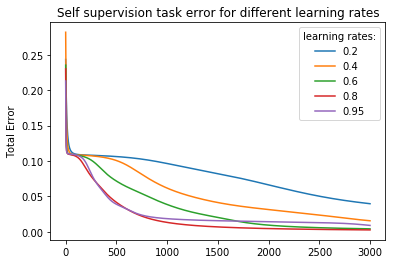

In [326]:
plt.plot(epoch_error0, label='0.2')
plt.plot(epoch_error1, label='0.4')
plt.plot(epoch_error2, label='0.6')
plt.plot(epoch_error3, label='0.8')
plt.plot(epoch_error4, label='0.95')
plt.ylabel('Total Error')
plt.title('Self supervision task error for different learning rates')
plt.legend(title='learning rates:')
plt.savefig('Figures/Self_supervision_lrs_2.png', dpi =400)

plt.show()



In [283]:
# training data
x_train = np.array([[[1,0,0,0,0,0,0,0]], [[0,1,0,0,0,0,0,0]], [[0,0,1,0,0,0,0,0]], [[0,0,0,1,0,0,0,0]],
                    [[0,0,0,0,1,0,0,0]], [[0,0,0,0,0,1,0,0]],[[0,0,0,0,0,0,1,0]], [[0,0,0,0,0,0,0,1]]])

y_train = x_train

#sigmoid, sigmoid_prime
#tanh, tanh_prime


# NeuralNet
net = NeuralNet()
net.add(FCLayer(8, 3))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.add(FCLayer(3, 8))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.use(mse, mse_prime)
epoch_error0 = net.fit(x_train, y_train, epochs=3000, learning_rate=0.2, alpha = 0)


# NeuralNet
net = NeuralNet()
net.add(FCLayer(8, 3))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.add(FCLayer(3, 8))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.use(mse, mse_prime)
epoch_error1 = net.fit(x_train, y_train, epochs=3000, learning_rate=0.2, alpha = 0.2)


# NeuralNet
net = NeuralNet()
net.add(FCLayer(8, 3))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.add(FCLayer(3, 8))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.use(mse, mse_prime)
epoch_error2 = net.fit(x_train, y_train, epochs=3000, learning_rate=0.2, alpha = 0.5)

# NeuralNet
net = NeuralNet()
net.add(FCLayer(8, 3))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.add(FCLayer(3, 8))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.use(mse, mse_prime)
epoch_error3 = net.fit(x_train, y_train, epochs=3000, learning_rate=0.2, alpha = 0.8)




epoch 1/3000   error=0.254865
epoch 2/3000   error=0.243096
epoch 3/3000   error=0.232118
epoch 4/3000   error=0.221917
epoch 5/3000   error=0.212472
epoch 6/3000   error=0.203759
epoch 7/3000   error=0.195750
epoch 8/3000   error=0.188411
epoch 9/3000   error=0.181708
epoch 10/3000   error=0.175600
epoch 11/3000   error=0.170048
epoch 12/3000   error=0.165009
epoch 13/3000   error=0.160441
epoch 14/3000   error=0.156303
epoch 15/3000   error=0.152556
epoch 16/3000   error=0.149163
epoch 17/3000   error=0.146088
epoch 18/3000   error=0.143301
epoch 19/3000   error=0.140771
epoch 20/3000   error=0.138472
epoch 21/3000   error=0.136381
epoch 22/3000   error=0.134476
epoch 23/3000   error=0.132737
epoch 24/3000   error=0.131149
epoch 25/3000   error=0.129695
epoch 26/3000   error=0.128362
epoch 27/3000   error=0.127138
epoch 28/3000   error=0.126013
epoch 29/3000   error=0.124976
epoch 30/3000   error=0.124020
epoch 31/3000   error=0.123137
epoch 32/3000   error=0.122320
epoch 33/3000   e

epoch 365/3000   error=0.108228
epoch 366/3000   error=0.108224
epoch 367/3000   error=0.108220
epoch 368/3000   error=0.108217
epoch 369/3000   error=0.108213
epoch 370/3000   error=0.108209
epoch 371/3000   error=0.108205
epoch 372/3000   error=0.108201
epoch 373/3000   error=0.108197
epoch 374/3000   error=0.108193
epoch 375/3000   error=0.108189
epoch 376/3000   error=0.108185
epoch 377/3000   error=0.108181
epoch 378/3000   error=0.108177
epoch 379/3000   error=0.108173
epoch 380/3000   error=0.108169
epoch 381/3000   error=0.108165
epoch 382/3000   error=0.108161
epoch 383/3000   error=0.108157
epoch 384/3000   error=0.108153
epoch 385/3000   error=0.108149
epoch 386/3000   error=0.108145
epoch 387/3000   error=0.108141
epoch 388/3000   error=0.108137
epoch 389/3000   error=0.108133
epoch 390/3000   error=0.108129
epoch 391/3000   error=0.108125
epoch 392/3000   error=0.108121
epoch 393/3000   error=0.108117
epoch 394/3000   error=0.108113
epoch 395/3000   error=0.108109
epoch 39

epoch 736/3000   error=0.105959
epoch 737/3000   error=0.105950
epoch 738/3000   error=0.105940
epoch 739/3000   error=0.105931
epoch 740/3000   error=0.105921
epoch 741/3000   error=0.105912
epoch 742/3000   error=0.105902
epoch 743/3000   error=0.105893
epoch 744/3000   error=0.105883
epoch 745/3000   error=0.105874
epoch 746/3000   error=0.105864
epoch 747/3000   error=0.105855
epoch 748/3000   error=0.105845
epoch 749/3000   error=0.105835
epoch 750/3000   error=0.105826
epoch 751/3000   error=0.105816
epoch 752/3000   error=0.105806
epoch 753/3000   error=0.105796
epoch 754/3000   error=0.105786
epoch 755/3000   error=0.105777
epoch 756/3000   error=0.105767
epoch 757/3000   error=0.105757
epoch 758/3000   error=0.105747
epoch 759/3000   error=0.105737
epoch 760/3000   error=0.105727
epoch 761/3000   error=0.105717
epoch 762/3000   error=0.105707
epoch 763/3000   error=0.105697
epoch 764/3000   error=0.105687
epoch 765/3000   error=0.105677
epoch 766/3000   error=0.105667
epoch 76

epoch 1090/3000   error=0.100531
epoch 1091/3000   error=0.100507
epoch 1092/3000   error=0.100484
epoch 1093/3000   error=0.100461
epoch 1094/3000   error=0.100438
epoch 1095/3000   error=0.100414
epoch 1096/3000   error=0.100391
epoch 1097/3000   error=0.100367
epoch 1098/3000   error=0.100344
epoch 1099/3000   error=0.100320
epoch 1100/3000   error=0.100297
epoch 1101/3000   error=0.100273
epoch 1102/3000   error=0.100249
epoch 1103/3000   error=0.100225
epoch 1104/3000   error=0.100202
epoch 1105/3000   error=0.100178
epoch 1106/3000   error=0.100154
epoch 1107/3000   error=0.100130
epoch 1108/3000   error=0.100106
epoch 1109/3000   error=0.100082
epoch 1110/3000   error=0.100057
epoch 1111/3000   error=0.100033
epoch 1112/3000   error=0.100009
epoch 1113/3000   error=0.099984
epoch 1114/3000   error=0.099960
epoch 1115/3000   error=0.099936
epoch 1116/3000   error=0.099911
epoch 1117/3000   error=0.099887
epoch 1118/3000   error=0.099862
epoch 1119/3000   error=0.099837
epoch 1120

epoch 1479/3000   error=0.088162
epoch 1480/3000   error=0.088127
epoch 1481/3000   error=0.088091
epoch 1482/3000   error=0.088056
epoch 1483/3000   error=0.088020
epoch 1484/3000   error=0.087985
epoch 1485/3000   error=0.087950
epoch 1486/3000   error=0.087914
epoch 1487/3000   error=0.087879
epoch 1488/3000   error=0.087843
epoch 1489/3000   error=0.087808
epoch 1490/3000   error=0.087773
epoch 1491/3000   error=0.087737
epoch 1492/3000   error=0.087702
epoch 1493/3000   error=0.087667
epoch 1494/3000   error=0.087631
epoch 1495/3000   error=0.087596
epoch 1496/3000   error=0.087561
epoch 1497/3000   error=0.087526
epoch 1498/3000   error=0.087490
epoch 1499/3000   error=0.087455
epoch 1500/3000   error=0.087420
epoch 1501/3000   error=0.087385
epoch 1502/3000   error=0.087350
epoch 1503/3000   error=0.087315
epoch 1504/3000   error=0.087279
epoch 1505/3000   error=0.087244
epoch 1506/3000   error=0.087209
epoch 1507/3000   error=0.087174
epoch 1508/3000   error=0.087139
epoch 1509

epoch 1819/3000   error=0.077626
epoch 1820/3000   error=0.077600
epoch 1821/3000   error=0.077573
epoch 1822/3000   error=0.077547
epoch 1823/3000   error=0.077521
epoch 1824/3000   error=0.077495
epoch 1825/3000   error=0.077469
epoch 1826/3000   error=0.077443
epoch 1827/3000   error=0.077417
epoch 1828/3000   error=0.077391
epoch 1829/3000   error=0.077365
epoch 1830/3000   error=0.077339
epoch 1831/3000   error=0.077313
epoch 1832/3000   error=0.077287
epoch 1833/3000   error=0.077261
epoch 1834/3000   error=0.077235
epoch 1835/3000   error=0.077209
epoch 1836/3000   error=0.077183
epoch 1837/3000   error=0.077158
epoch 1838/3000   error=0.077132
epoch 1839/3000   error=0.077106
epoch 1840/3000   error=0.077080
epoch 1841/3000   error=0.077055
epoch 1842/3000   error=0.077029
epoch 1843/3000   error=0.077003
epoch 1844/3000   error=0.076977
epoch 1845/3000   error=0.076952
epoch 1846/3000   error=0.076926
epoch 1847/3000   error=0.076901
epoch 1848/3000   error=0.076875
epoch 1849

epoch 2209/3000   error=0.068591
epoch 2210/3000   error=0.068569
epoch 2211/3000   error=0.068548
epoch 2212/3000   error=0.068527
epoch 2213/3000   error=0.068506
epoch 2214/3000   error=0.068485
epoch 2215/3000   error=0.068463
epoch 2216/3000   error=0.068442
epoch 2217/3000   error=0.068421
epoch 2218/3000   error=0.068400
epoch 2219/3000   error=0.068379
epoch 2220/3000   error=0.068357
epoch 2221/3000   error=0.068336
epoch 2222/3000   error=0.068315
epoch 2223/3000   error=0.068294
epoch 2224/3000   error=0.068273
epoch 2225/3000   error=0.068252
epoch 2226/3000   error=0.068231
epoch 2227/3000   error=0.068209
epoch 2228/3000   error=0.068188
epoch 2229/3000   error=0.068167
epoch 2230/3000   error=0.068146
epoch 2231/3000   error=0.068125
epoch 2232/3000   error=0.068104
epoch 2233/3000   error=0.068083
epoch 2234/3000   error=0.068062
epoch 2235/3000   error=0.068041
epoch 2236/3000   error=0.068019
epoch 2237/3000   error=0.067998
epoch 2238/3000   error=0.067977
epoch 2239

epoch 2488/3000   error=0.062907
epoch 2489/3000   error=0.062888
epoch 2490/3000   error=0.062868
epoch 2491/3000   error=0.062849
epoch 2492/3000   error=0.062829
epoch 2493/3000   error=0.062810
epoch 2494/3000   error=0.062791
epoch 2495/3000   error=0.062771
epoch 2496/3000   error=0.062752
epoch 2497/3000   error=0.062733
epoch 2498/3000   error=0.062713
epoch 2499/3000   error=0.062694
epoch 2500/3000   error=0.062675
epoch 2501/3000   error=0.062655
epoch 2502/3000   error=0.062636
epoch 2503/3000   error=0.062617
epoch 2504/3000   error=0.062597
epoch 2505/3000   error=0.062578
epoch 2506/3000   error=0.062559
epoch 2507/3000   error=0.062540
epoch 2508/3000   error=0.062520
epoch 2509/3000   error=0.062501
epoch 2510/3000   error=0.062482
epoch 2511/3000   error=0.062463
epoch 2512/3000   error=0.062443
epoch 2513/3000   error=0.062424
epoch 2514/3000   error=0.062405
epoch 2515/3000   error=0.062386
epoch 2516/3000   error=0.062367
epoch 2517/3000   error=0.062348
epoch 2518

epoch 2834/3000   error=0.056767
epoch 2835/3000   error=0.056751
epoch 2836/3000   error=0.056736
epoch 2837/3000   error=0.056720
epoch 2838/3000   error=0.056704
epoch 2839/3000   error=0.056688
epoch 2840/3000   error=0.056672
epoch 2841/3000   error=0.056656
epoch 2842/3000   error=0.056641
epoch 2843/3000   error=0.056625
epoch 2844/3000   error=0.056609
epoch 2845/3000   error=0.056593
epoch 2846/3000   error=0.056577
epoch 2847/3000   error=0.056562
epoch 2848/3000   error=0.056546
epoch 2849/3000   error=0.056530
epoch 2850/3000   error=0.056514
epoch 2851/3000   error=0.056499
epoch 2852/3000   error=0.056483
epoch 2853/3000   error=0.056467
epoch 2854/3000   error=0.056452
epoch 2855/3000   error=0.056436
epoch 2856/3000   error=0.056420
epoch 2857/3000   error=0.056405
epoch 2858/3000   error=0.056389
epoch 2859/3000   error=0.056373
epoch 2860/3000   error=0.056358
epoch 2861/3000   error=0.056342
epoch 2862/3000   error=0.056327
epoch 2863/3000   error=0.056311
epoch 2864

epoch 302/3000   error=0.107585
epoch 303/3000   error=0.107577
epoch 304/3000   error=0.107570
epoch 305/3000   error=0.107562
epoch 306/3000   error=0.107554
epoch 307/3000   error=0.107546
epoch 308/3000   error=0.107538
epoch 309/3000   error=0.107530
epoch 310/3000   error=0.107522
epoch 311/3000   error=0.107514
epoch 312/3000   error=0.107506
epoch 313/3000   error=0.107498
epoch 314/3000   error=0.107489
epoch 315/3000   error=0.107481
epoch 316/3000   error=0.107473
epoch 317/3000   error=0.107465
epoch 318/3000   error=0.107457
epoch 319/3000   error=0.107448
epoch 320/3000   error=0.107440
epoch 321/3000   error=0.107432
epoch 322/3000   error=0.107424
epoch 323/3000   error=0.107415
epoch 324/3000   error=0.107407
epoch 325/3000   error=0.107398
epoch 326/3000   error=0.107390
epoch 327/3000   error=0.107381
epoch 328/3000   error=0.107373
epoch 329/3000   error=0.107364
epoch 330/3000   error=0.107356
epoch 331/3000   error=0.107347
epoch 332/3000   error=0.107339
epoch 33

epoch 732/3000   error=0.099119
epoch 733/3000   error=0.099082
epoch 734/3000   error=0.099045
epoch 735/3000   error=0.099008
epoch 736/3000   error=0.098971
epoch 737/3000   error=0.098934
epoch 738/3000   error=0.098897
epoch 739/3000   error=0.098859
epoch 740/3000   error=0.098822
epoch 741/3000   error=0.098784
epoch 742/3000   error=0.098747
epoch 743/3000   error=0.098709
epoch 744/3000   error=0.098672
epoch 745/3000   error=0.098634
epoch 746/3000   error=0.098596
epoch 747/3000   error=0.098558
epoch 748/3000   error=0.098520
epoch 749/3000   error=0.098482
epoch 750/3000   error=0.098444
epoch 751/3000   error=0.098406
epoch 752/3000   error=0.098368
epoch 753/3000   error=0.098329
epoch 754/3000   error=0.098291
epoch 755/3000   error=0.098252
epoch 756/3000   error=0.098214
epoch 757/3000   error=0.098175
epoch 758/3000   error=0.098137
epoch 759/3000   error=0.098098
epoch 760/3000   error=0.098059
epoch 761/3000   error=0.098020
epoch 762/3000   error=0.097981
epoch 76

epoch 1188/3000   error=0.079956
epoch 1189/3000   error=0.079921
epoch 1190/3000   error=0.079886
epoch 1191/3000   error=0.079851
epoch 1192/3000   error=0.079816
epoch 1193/3000   error=0.079782
epoch 1194/3000   error=0.079747
epoch 1195/3000   error=0.079712
epoch 1196/3000   error=0.079678
epoch 1197/3000   error=0.079643
epoch 1198/3000   error=0.079609
epoch 1199/3000   error=0.079575
epoch 1200/3000   error=0.079540
epoch 1201/3000   error=0.079506
epoch 1202/3000   error=0.079472
epoch 1203/3000   error=0.079438
epoch 1204/3000   error=0.079404
epoch 1205/3000   error=0.079370
epoch 1206/3000   error=0.079336
epoch 1207/3000   error=0.079302
epoch 1208/3000   error=0.079268
epoch 1209/3000   error=0.079235
epoch 1210/3000   error=0.079201
epoch 1211/3000   error=0.079168
epoch 1212/3000   error=0.079134
epoch 1213/3000   error=0.079101
epoch 1214/3000   error=0.079067
epoch 1215/3000   error=0.079034
epoch 1216/3000   error=0.079001
epoch 1217/3000   error=0.078967
epoch 1218

epoch 1662/3000   error=0.067873
epoch 1663/3000   error=0.067852
epoch 1664/3000   error=0.067831
epoch 1665/3000   error=0.067810
epoch 1666/3000   error=0.067789
epoch 1667/3000   error=0.067767
epoch 1668/3000   error=0.067746
epoch 1669/3000   error=0.067725
epoch 1670/3000   error=0.067704
epoch 1671/3000   error=0.067682
epoch 1672/3000   error=0.067661
epoch 1673/3000   error=0.067640
epoch 1674/3000   error=0.067619
epoch 1675/3000   error=0.067597
epoch 1676/3000   error=0.067576
epoch 1677/3000   error=0.067555
epoch 1678/3000   error=0.067534
epoch 1679/3000   error=0.067513
epoch 1680/3000   error=0.067491
epoch 1681/3000   error=0.067470
epoch 1682/3000   error=0.067449
epoch 1683/3000   error=0.067428
epoch 1684/3000   error=0.067407
epoch 1685/3000   error=0.067385
epoch 1686/3000   error=0.067364
epoch 1687/3000   error=0.067343
epoch 1688/3000   error=0.067322
epoch 1689/3000   error=0.067301
epoch 1690/3000   error=0.067279
epoch 1691/3000   error=0.067258
epoch 1692

epoch 2106/3000   error=0.058372
epoch 2107/3000   error=0.058350
epoch 2108/3000   error=0.058328
epoch 2109/3000   error=0.058307
epoch 2110/3000   error=0.058285
epoch 2111/3000   error=0.058263
epoch 2112/3000   error=0.058241
epoch 2113/3000   error=0.058219
epoch 2114/3000   error=0.058197
epoch 2115/3000   error=0.058175
epoch 2116/3000   error=0.058153
epoch 2117/3000   error=0.058131
epoch 2118/3000   error=0.058109
epoch 2119/3000   error=0.058087
epoch 2120/3000   error=0.058066
epoch 2121/3000   error=0.058044
epoch 2122/3000   error=0.058022
epoch 2123/3000   error=0.058000
epoch 2124/3000   error=0.057978
epoch 2125/3000   error=0.057956
epoch 2126/3000   error=0.057934
epoch 2127/3000   error=0.057912
epoch 2128/3000   error=0.057890
epoch 2129/3000   error=0.057868
epoch 2130/3000   error=0.057846
epoch 2131/3000   error=0.057824
epoch 2132/3000   error=0.057802
epoch 2133/3000   error=0.057780
epoch 2134/3000   error=0.057758
epoch 2135/3000   error=0.057736
epoch 2136

epoch 2556/3000   error=0.047846
epoch 2557/3000   error=0.047820
epoch 2558/3000   error=0.047795
epoch 2559/3000   error=0.047769
epoch 2560/3000   error=0.047743
epoch 2561/3000   error=0.047717
epoch 2562/3000   error=0.047691
epoch 2563/3000   error=0.047665
epoch 2564/3000   error=0.047639
epoch 2565/3000   error=0.047613
epoch 2566/3000   error=0.047587
epoch 2567/3000   error=0.047561
epoch 2568/3000   error=0.047535
epoch 2569/3000   error=0.047509
epoch 2570/3000   error=0.047483
epoch 2571/3000   error=0.047457
epoch 2572/3000   error=0.047431
epoch 2573/3000   error=0.047405
epoch 2574/3000   error=0.047379
epoch 2575/3000   error=0.047353
epoch 2576/3000   error=0.047327
epoch 2577/3000   error=0.047301
epoch 2578/3000   error=0.047275
epoch 2579/3000   error=0.047249
epoch 2580/3000   error=0.047223
epoch 2581/3000   error=0.047197
epoch 2582/3000   error=0.047170
epoch 2583/3000   error=0.047144
epoch 2584/3000   error=0.047118
epoch 2585/3000   error=0.047092
epoch 2586

epoch 2/3000   error=0.236626
epoch 3/3000   error=0.223336
epoch 4/3000   error=0.211435
epoch 5/3000   error=0.200818
epoch 6/3000   error=0.191375
epoch 7/3000   error=0.182992
epoch 8/3000   error=0.175559
epoch 9/3000   error=0.168974
epoch 10/3000   error=0.163139
epoch 11/3000   error=0.157967
epoch 12/3000   error=0.153377
epoch 13/3000   error=0.149300
epoch 14/3000   error=0.145673
epoch 15/3000   error=0.142440
epoch 16/3000   error=0.139554
epoch 17/3000   error=0.136972
epoch 18/3000   error=0.134658
epoch 19/3000   error=0.132579
epoch 20/3000   error=0.130708
epoch 21/3000   error=0.129021
epoch 22/3000   error=0.127496
epoch 23/3000   error=0.126115
epoch 24/3000   error=0.124862
epoch 25/3000   error=0.123723
epoch 26/3000   error=0.122686
epoch 27/3000   error=0.121739
epoch 28/3000   error=0.120874
epoch 29/3000   error=0.120082
epoch 30/3000   error=0.119355
epoch 31/3000   error=0.118688
epoch 32/3000   error=0.118073
epoch 33/3000   error=0.117507
epoch 34/3000   

epoch 477/3000   error=0.105768
epoch 478/3000   error=0.105752
epoch 479/3000   error=0.105736
epoch 480/3000   error=0.105719
epoch 481/3000   error=0.105702
epoch 482/3000   error=0.105686
epoch 483/3000   error=0.105669
epoch 484/3000   error=0.105652
epoch 485/3000   error=0.105635
epoch 486/3000   error=0.105618
epoch 487/3000   error=0.105601
epoch 488/3000   error=0.105584
epoch 489/3000   error=0.105567
epoch 490/3000   error=0.105550
epoch 491/3000   error=0.105532
epoch 492/3000   error=0.105515
epoch 493/3000   error=0.105497
epoch 494/3000   error=0.105480
epoch 495/3000   error=0.105462
epoch 496/3000   error=0.105444
epoch 497/3000   error=0.105426
epoch 498/3000   error=0.105408
epoch 499/3000   error=0.105390
epoch 500/3000   error=0.105372
epoch 501/3000   error=0.105354
epoch 502/3000   error=0.105336
epoch 503/3000   error=0.105318
epoch 504/3000   error=0.105299
epoch 505/3000   error=0.105281
epoch 506/3000   error=0.105262
epoch 507/3000   error=0.105243
epoch 50

epoch 906/3000   error=0.088883
epoch 907/3000   error=0.088828
epoch 908/3000   error=0.088773
epoch 909/3000   error=0.088718
epoch 910/3000   error=0.088662
epoch 911/3000   error=0.088607
epoch 912/3000   error=0.088552
epoch 913/3000   error=0.088497
epoch 914/3000   error=0.088442
epoch 915/3000   error=0.088387
epoch 916/3000   error=0.088332
epoch 917/3000   error=0.088277
epoch 918/3000   error=0.088222
epoch 919/3000   error=0.088167
epoch 920/3000   error=0.088112
epoch 921/3000   error=0.088058
epoch 922/3000   error=0.088003
epoch 923/3000   error=0.087948
epoch 924/3000   error=0.087894
epoch 925/3000   error=0.087839
epoch 926/3000   error=0.087784
epoch 927/3000   error=0.087730
epoch 928/3000   error=0.087675
epoch 929/3000   error=0.087621
epoch 930/3000   error=0.087567
epoch 931/3000   error=0.087512
epoch 932/3000   error=0.087458
epoch 933/3000   error=0.087404
epoch 934/3000   error=0.087350
epoch 935/3000   error=0.087296
epoch 936/3000   error=0.087242
epoch 93

epoch 1276/3000   error=0.072895
epoch 1277/3000   error=0.072864
epoch 1278/3000   error=0.072832
epoch 1279/3000   error=0.072801
epoch 1280/3000   error=0.072770
epoch 1281/3000   error=0.072738
epoch 1282/3000   error=0.072707
epoch 1283/3000   error=0.072676
epoch 1284/3000   error=0.072645
epoch 1285/3000   error=0.072614
epoch 1286/3000   error=0.072583
epoch 1287/3000   error=0.072552
epoch 1288/3000   error=0.072521
epoch 1289/3000   error=0.072490
epoch 1290/3000   error=0.072459
epoch 1291/3000   error=0.072428
epoch 1292/3000   error=0.072397
epoch 1293/3000   error=0.072366
epoch 1294/3000   error=0.072336
epoch 1295/3000   error=0.072305
epoch 1296/3000   error=0.072274
epoch 1297/3000   error=0.072244
epoch 1298/3000   error=0.072213
epoch 1299/3000   error=0.072183
epoch 1300/3000   error=0.072152
epoch 1301/3000   error=0.072122
epoch 1302/3000   error=0.072092
epoch 1303/3000   error=0.072062
epoch 1304/3000   error=0.072031
epoch 1305/3000   error=0.072001
epoch 1306

epoch 1563/3000   error=0.065443
epoch 1564/3000   error=0.065421
epoch 1565/3000   error=0.065400
epoch 1566/3000   error=0.065378
epoch 1567/3000   error=0.065356
epoch 1568/3000   error=0.065335
epoch 1569/3000   error=0.065313
epoch 1570/3000   error=0.065291
epoch 1571/3000   error=0.065270
epoch 1572/3000   error=0.065248
epoch 1573/3000   error=0.065227
epoch 1574/3000   error=0.065205
epoch 1575/3000   error=0.065184
epoch 1576/3000   error=0.065162
epoch 1577/3000   error=0.065140
epoch 1578/3000   error=0.065119
epoch 1579/3000   error=0.065098
epoch 1580/3000   error=0.065076
epoch 1581/3000   error=0.065055
epoch 1582/3000   error=0.065033
epoch 1583/3000   error=0.065012
epoch 1584/3000   error=0.064991
epoch 1585/3000   error=0.064969
epoch 1586/3000   error=0.064948
epoch 1587/3000   error=0.064926
epoch 1588/3000   error=0.064905
epoch 1589/3000   error=0.064884
epoch 1590/3000   error=0.064863
epoch 1591/3000   error=0.064841
epoch 1592/3000   error=0.064820
epoch 1593

epoch 1865/3000   error=0.059386
epoch 1866/3000   error=0.059367
epoch 1867/3000   error=0.059348
epoch 1868/3000   error=0.059328
epoch 1869/3000   error=0.059309
epoch 1870/3000   error=0.059290
epoch 1871/3000   error=0.059270
epoch 1872/3000   error=0.059251
epoch 1873/3000   error=0.059232
epoch 1874/3000   error=0.059212
epoch 1875/3000   error=0.059193
epoch 1876/3000   error=0.059174
epoch 1877/3000   error=0.059154
epoch 1878/3000   error=0.059135
epoch 1879/3000   error=0.059115
epoch 1880/3000   error=0.059096
epoch 1881/3000   error=0.059077
epoch 1882/3000   error=0.059057
epoch 1883/3000   error=0.059038
epoch 1884/3000   error=0.059019
epoch 1885/3000   error=0.058999
epoch 1886/3000   error=0.058980
epoch 1887/3000   error=0.058961
epoch 1888/3000   error=0.058941
epoch 1889/3000   error=0.058922
epoch 1890/3000   error=0.058903
epoch 1891/3000   error=0.058883
epoch 1892/3000   error=0.058864
epoch 1893/3000   error=0.058845
epoch 1894/3000   error=0.058825
epoch 1895

epoch 2219/3000   error=0.052594
epoch 2220/3000   error=0.052575
epoch 2221/3000   error=0.052556
epoch 2222/3000   error=0.052538
epoch 2223/3000   error=0.052519
epoch 2224/3000   error=0.052501
epoch 2225/3000   error=0.052482
epoch 2226/3000   error=0.052464
epoch 2227/3000   error=0.052445
epoch 2228/3000   error=0.052427
epoch 2229/3000   error=0.052408
epoch 2230/3000   error=0.052390
epoch 2231/3000   error=0.052371
epoch 2232/3000   error=0.052353
epoch 2233/3000   error=0.052334
epoch 2234/3000   error=0.052316
epoch 2235/3000   error=0.052297
epoch 2236/3000   error=0.052279
epoch 2237/3000   error=0.052260
epoch 2238/3000   error=0.052242
epoch 2239/3000   error=0.052223
epoch 2240/3000   error=0.052205
epoch 2241/3000   error=0.052186
epoch 2242/3000   error=0.052168
epoch 2243/3000   error=0.052150
epoch 2244/3000   error=0.052131
epoch 2245/3000   error=0.052113
epoch 2246/3000   error=0.052094
epoch 2247/3000   error=0.052076
epoch 2248/3000   error=0.052058
epoch 2249

epoch 2667/3000   error=0.045233
epoch 2668/3000   error=0.045219
epoch 2669/3000   error=0.045205
epoch 2670/3000   error=0.045191
epoch 2671/3000   error=0.045177
epoch 2672/3000   error=0.045163
epoch 2673/3000   error=0.045149
epoch 2674/3000   error=0.045135
epoch 2675/3000   error=0.045121
epoch 2676/3000   error=0.045107
epoch 2677/3000   error=0.045094
epoch 2678/3000   error=0.045080
epoch 2679/3000   error=0.045066
epoch 2680/3000   error=0.045052
epoch 2681/3000   error=0.045038
epoch 2682/3000   error=0.045024
epoch 2683/3000   error=0.045010
epoch 2684/3000   error=0.044996
epoch 2685/3000   error=0.044982
epoch 2686/3000   error=0.044969
epoch 2687/3000   error=0.044955
epoch 2688/3000   error=0.044941
epoch 2689/3000   error=0.044927
epoch 2690/3000   error=0.044913
epoch 2691/3000   error=0.044900
epoch 2692/3000   error=0.044886
epoch 2693/3000   error=0.044872
epoch 2694/3000   error=0.044858
epoch 2695/3000   error=0.044844
epoch 2696/3000   error=0.044831
epoch 2697

epoch 60/3000   error=0.110759
epoch 61/3000   error=0.110698
epoch 62/3000   error=0.110641
epoch 63/3000   error=0.110588
epoch 64/3000   error=0.110537
epoch 65/3000   error=0.110488
epoch 66/3000   error=0.110442
epoch 67/3000   error=0.110399
epoch 68/3000   error=0.110358
epoch 69/3000   error=0.110318
epoch 70/3000   error=0.110281
epoch 71/3000   error=0.110245
epoch 72/3000   error=0.110211
epoch 73/3000   error=0.110179
epoch 74/3000   error=0.110148
epoch 75/3000   error=0.110119
epoch 76/3000   error=0.110091
epoch 77/3000   error=0.110064
epoch 78/3000   error=0.110038
epoch 79/3000   error=0.110014
epoch 80/3000   error=0.109990
epoch 81/3000   error=0.109968
epoch 82/3000   error=0.109946
epoch 83/3000   error=0.109925
epoch 84/3000   error=0.109905
epoch 85/3000   error=0.109886
epoch 86/3000   error=0.109868
epoch 87/3000   error=0.109850
epoch 88/3000   error=0.109833
epoch 89/3000   error=0.109817
epoch 90/3000   error=0.109801
epoch 91/3000   error=0.109786
epoch 92

epoch 434/3000   error=0.107420
epoch 435/3000   error=0.107408
epoch 436/3000   error=0.107397
epoch 437/3000   error=0.107386
epoch 438/3000   error=0.107374
epoch 439/3000   error=0.107363
epoch 440/3000   error=0.107351
epoch 441/3000   error=0.107340
epoch 442/3000   error=0.107328
epoch 443/3000   error=0.107317
epoch 444/3000   error=0.107305
epoch 445/3000   error=0.107293
epoch 446/3000   error=0.107281
epoch 447/3000   error=0.107269
epoch 448/3000   error=0.107257
epoch 449/3000   error=0.107245
epoch 450/3000   error=0.107233
epoch 451/3000   error=0.107221
epoch 452/3000   error=0.107209
epoch 453/3000   error=0.107196
epoch 454/3000   error=0.107184
epoch 455/3000   error=0.107172
epoch 456/3000   error=0.107159
epoch 457/3000   error=0.107147
epoch 458/3000   error=0.107134
epoch 459/3000   error=0.107121
epoch 460/3000   error=0.107109
epoch 461/3000   error=0.107096
epoch 462/3000   error=0.107083
epoch 463/3000   error=0.107070
epoch 464/3000   error=0.107057
epoch 46

epoch 858/3000   error=0.091315
epoch 859/3000   error=0.091249
epoch 860/3000   error=0.091184
epoch 861/3000   error=0.091119
epoch 862/3000   error=0.091053
epoch 863/3000   error=0.090988
epoch 864/3000   error=0.090923
epoch 865/3000   error=0.090857
epoch 866/3000   error=0.090792
epoch 867/3000   error=0.090727
epoch 868/3000   error=0.090662
epoch 869/3000   error=0.090597
epoch 870/3000   error=0.090532
epoch 871/3000   error=0.090467
epoch 872/3000   error=0.090402
epoch 873/3000   error=0.090338
epoch 874/3000   error=0.090273
epoch 875/3000   error=0.090208
epoch 876/3000   error=0.090144
epoch 877/3000   error=0.090079
epoch 878/3000   error=0.090015
epoch 879/3000   error=0.089950
epoch 880/3000   error=0.089886
epoch 881/3000   error=0.089822
epoch 882/3000   error=0.089758
epoch 883/3000   error=0.089694
epoch 884/3000   error=0.089630
epoch 885/3000   error=0.089566
epoch 886/3000   error=0.089502
epoch 887/3000   error=0.089438
epoch 888/3000   error=0.089375
epoch 88

epoch 1294/3000   error=0.070472
epoch 1295/3000   error=0.070436
epoch 1296/3000   error=0.070399
epoch 1297/3000   error=0.070363
epoch 1298/3000   error=0.070327
epoch 1299/3000   error=0.070291
epoch 1300/3000   error=0.070254
epoch 1301/3000   error=0.070218
epoch 1302/3000   error=0.070182
epoch 1303/3000   error=0.070146
epoch 1304/3000   error=0.070110
epoch 1305/3000   error=0.070074
epoch 1306/3000   error=0.070038
epoch 1307/3000   error=0.070002
epoch 1308/3000   error=0.069966
epoch 1309/3000   error=0.069930
epoch 1310/3000   error=0.069894
epoch 1311/3000   error=0.069859
epoch 1312/3000   error=0.069823
epoch 1313/3000   error=0.069787
epoch 1314/3000   error=0.069752
epoch 1315/3000   error=0.069716
epoch 1316/3000   error=0.069681
epoch 1317/3000   error=0.069645
epoch 1318/3000   error=0.069610
epoch 1319/3000   error=0.069574
epoch 1320/3000   error=0.069539
epoch 1321/3000   error=0.069504
epoch 1322/3000   error=0.069468
epoch 1323/3000   error=0.069433
epoch 1324

epoch 1721/3000   error=0.058082
epoch 1722/3000   error=0.058057
epoch 1723/3000   error=0.058031
epoch 1724/3000   error=0.058006
epoch 1725/3000   error=0.057981
epoch 1726/3000   error=0.057955
epoch 1727/3000   error=0.057930
epoch 1728/3000   error=0.057904
epoch 1729/3000   error=0.057879
epoch 1730/3000   error=0.057854
epoch 1731/3000   error=0.057828
epoch 1732/3000   error=0.057803
epoch 1733/3000   error=0.057778
epoch 1734/3000   error=0.057752
epoch 1735/3000   error=0.057727
epoch 1736/3000   error=0.057702
epoch 1737/3000   error=0.057676
epoch 1738/3000   error=0.057651
epoch 1739/3000   error=0.057625
epoch 1740/3000   error=0.057600
epoch 1741/3000   error=0.057575
epoch 1742/3000   error=0.057549
epoch 1743/3000   error=0.057524
epoch 1744/3000   error=0.057498
epoch 1745/3000   error=0.057473
epoch 1746/3000   error=0.057448
epoch 1747/3000   error=0.057422
epoch 1748/3000   error=0.057397
epoch 1749/3000   error=0.057371
epoch 1750/3000   error=0.057346
epoch 1751

epoch 2060/3000   error=0.049061
epoch 2061/3000   error=0.049034
epoch 2062/3000   error=0.049006
epoch 2063/3000   error=0.048978
epoch 2064/3000   error=0.048951
epoch 2065/3000   error=0.048923
epoch 2066/3000   error=0.048896
epoch 2067/3000   error=0.048868
epoch 2068/3000   error=0.048841
epoch 2069/3000   error=0.048813
epoch 2070/3000   error=0.048786
epoch 2071/3000   error=0.048758
epoch 2072/3000   error=0.048731
epoch 2073/3000   error=0.048703
epoch 2074/3000   error=0.048676
epoch 2075/3000   error=0.048649
epoch 2076/3000   error=0.048621
epoch 2077/3000   error=0.048594
epoch 2078/3000   error=0.048566
epoch 2079/3000   error=0.048539
epoch 2080/3000   error=0.048512
epoch 2081/3000   error=0.048484
epoch 2082/3000   error=0.048457
epoch 2083/3000   error=0.048429
epoch 2084/3000   error=0.048402
epoch 2085/3000   error=0.048375
epoch 2086/3000   error=0.048348
epoch 2087/3000   error=0.048320
epoch 2088/3000   error=0.048293
epoch 2089/3000   error=0.048266
epoch 2090

epoch 2398/3000   error=0.041015
epoch 2399/3000   error=0.040996
epoch 2400/3000   error=0.040977
epoch 2401/3000   error=0.040958
epoch 2402/3000   error=0.040939
epoch 2403/3000   error=0.040920
epoch 2404/3000   error=0.040901
epoch 2405/3000   error=0.040882
epoch 2406/3000   error=0.040864
epoch 2407/3000   error=0.040845
epoch 2408/3000   error=0.040826
epoch 2409/3000   error=0.040807
epoch 2410/3000   error=0.040789
epoch 2411/3000   error=0.040770
epoch 2412/3000   error=0.040751
epoch 2413/3000   error=0.040733
epoch 2414/3000   error=0.040714
epoch 2415/3000   error=0.040695
epoch 2416/3000   error=0.040677
epoch 2417/3000   error=0.040658
epoch 2418/3000   error=0.040640
epoch 2419/3000   error=0.040621
epoch 2420/3000   error=0.040603
epoch 2421/3000   error=0.040584
epoch 2422/3000   error=0.040566
epoch 2423/3000   error=0.040548
epoch 2424/3000   error=0.040529
epoch 2425/3000   error=0.040511
epoch 2426/3000   error=0.040493
epoch 2427/3000   error=0.040474
epoch 2428

epoch 2710/3000   error=0.036110
epoch 2711/3000   error=0.036096
epoch 2712/3000   error=0.036083
epoch 2713/3000   error=0.036070
epoch 2714/3000   error=0.036056
epoch 2715/3000   error=0.036043
epoch 2716/3000   error=0.036030
epoch 2717/3000   error=0.036016
epoch 2718/3000   error=0.036003
epoch 2719/3000   error=0.035990
epoch 2720/3000   error=0.035976
epoch 2721/3000   error=0.035963
epoch 2722/3000   error=0.035950
epoch 2723/3000   error=0.035937
epoch 2724/3000   error=0.035923
epoch 2725/3000   error=0.035910
epoch 2726/3000   error=0.035897
epoch 2727/3000   error=0.035884
epoch 2728/3000   error=0.035870
epoch 2729/3000   error=0.035857
epoch 2730/3000   error=0.035844
epoch 2731/3000   error=0.035831
epoch 2732/3000   error=0.035817
epoch 2733/3000   error=0.035804
epoch 2734/3000   error=0.035791
epoch 2735/3000   error=0.035778
epoch 2736/3000   error=0.035765
epoch 2737/3000   error=0.035752
epoch 2738/3000   error=0.035738
epoch 2739/3000   error=0.035725
epoch 2740

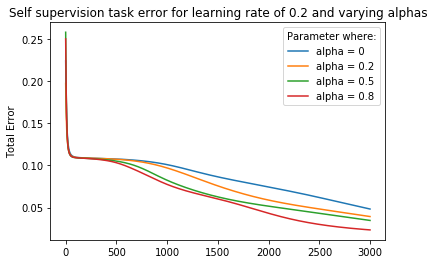

In [146]:

plt.plot(epoch_error0, label='alpha = 0')
plt.plot(epoch_error1, label='alpha = 0.2')
plt.plot(epoch_error2, label='alpha = 0.5')
plt.plot(epoch_error3, label='alpha = 0.8')
plt.ylabel('Total Error')
plt.title('Self supervision task error for learning rate of 0.2 and varying alphas')
plt.legend(title='Parameter where:')
plt.savefig('Figures/Autoencoder_lr02.png', dpi =400)

plt.show()


In [294]:
# training data
x_train = np.array([[[1,0,0,0,0,0,0,0]], [[0,1,0,0,0,0,0,0]], [[0,0,1,0,0,0,0,0]], [[0,0,0,1,0,0,0,0]],
                    [[0,0,0,0,1,0,0,0]], [[0,0,0,0,0,1,0,0]],[[0,0,0,0,0,0,1,0]], [[0,0,0,0,0,0,0,1]]])

y_train = x_train

# NeuralNet
net = NeuralNet()
first_layer = FCLayer(8, 3)
net.add(first_layer)
#sigmoid, sigmoid_prime
#tanh, tanh_prime
net.add(ActivationLayer(sigmoid, sigmoid_prime))
second_layer = FCLayer(3, 8)
net.add(second_layer )
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(mse, mse_prime)
epoch_error = net.fit(x_train, y_train, epochs=5000, learning_rate=0.8, alpha = 0.8)

# test
out = net.predict(x_train)
print(out)


epoch 1/5000   error=0.239145
epoch 2/5000   error=0.193833
epoch 3/5000   error=0.165000
epoch 4/5000   error=0.146998
epoch 5/5000   error=0.135614
epoch 6/5000   error=0.128225
epoch 7/5000   error=0.123282
epoch 8/5000   error=0.119876
epoch 9/5000   error=0.117464
epoch 10/5000   error=0.115714
epoch 11/5000   error=0.114416
epoch 12/5000   error=0.113435
epoch 13/5000   error=0.112680
epoch 14/5000   error=0.112091
epoch 15/5000   error=0.111624
epoch 16/5000   error=0.111250
epoch 17/5000   error=0.110946
epoch 18/5000   error=0.110697
epoch 19/5000   error=0.110490
epoch 20/5000   error=0.110316
epoch 21/5000   error=0.110170
epoch 22/5000   error=0.110044
epoch 23/5000   error=0.109936
epoch 24/5000   error=0.109841
epoch 25/5000   error=0.109758
epoch 26/5000   error=0.109684
epoch 27/5000   error=0.109618
epoch 28/5000   error=0.109558
epoch 29/5000   error=0.109504
epoch 30/5000   error=0.109453
epoch 31/5000   error=0.109407
epoch 32/5000   error=0.109363
epoch 33/5000   e

epoch 405/5000   error=0.046715
epoch 406/5000   error=0.046608
epoch 407/5000   error=0.046501
epoch 408/5000   error=0.046396
epoch 409/5000   error=0.046291
epoch 410/5000   error=0.046187
epoch 411/5000   error=0.046083
epoch 412/5000   error=0.045980
epoch 413/5000   error=0.045878
epoch 414/5000   error=0.045776
epoch 415/5000   error=0.045675
epoch 416/5000   error=0.045575
epoch 417/5000   error=0.045475
epoch 418/5000   error=0.045376
epoch 419/5000   error=0.045278
epoch 420/5000   error=0.045180
epoch 421/5000   error=0.045083
epoch 422/5000   error=0.044986
epoch 423/5000   error=0.044890
epoch 424/5000   error=0.044795
epoch 425/5000   error=0.044700
epoch 426/5000   error=0.044606
epoch 427/5000   error=0.044512
epoch 428/5000   error=0.044419
epoch 429/5000   error=0.044327
epoch 430/5000   error=0.044235
epoch 431/5000   error=0.044144
epoch 432/5000   error=0.044054
epoch 433/5000   error=0.043964
epoch 434/5000   error=0.043874
epoch 435/5000   error=0.043785
epoch 43

epoch 734/5000   error=0.028372
epoch 735/5000   error=0.028333
epoch 736/5000   error=0.028294
epoch 737/5000   error=0.028255
epoch 738/5000   error=0.028216
epoch 739/5000   error=0.028177
epoch 740/5000   error=0.028139
epoch 741/5000   error=0.028100
epoch 742/5000   error=0.028061
epoch 743/5000   error=0.028023
epoch 744/5000   error=0.027984
epoch 745/5000   error=0.027946
epoch 746/5000   error=0.027908
epoch 747/5000   error=0.027869
epoch 748/5000   error=0.027831
epoch 749/5000   error=0.027793
epoch 750/5000   error=0.027755
epoch 751/5000   error=0.027717
epoch 752/5000   error=0.027679
epoch 753/5000   error=0.027641
epoch 754/5000   error=0.027603
epoch 755/5000   error=0.027565
epoch 756/5000   error=0.027528
epoch 757/5000   error=0.027490
epoch 758/5000   error=0.027453
epoch 759/5000   error=0.027415
epoch 760/5000   error=0.027378
epoch 761/5000   error=0.027340
epoch 762/5000   error=0.027303
epoch 763/5000   error=0.027266
epoch 764/5000   error=0.027229
epoch 76

epoch 1089/5000   error=0.019102
epoch 1090/5000   error=0.019087
epoch 1091/5000   error=0.019072
epoch 1092/5000   error=0.019057
epoch 1093/5000   error=0.019042
epoch 1094/5000   error=0.019027
epoch 1095/5000   error=0.019012
epoch 1096/5000   error=0.018997
epoch 1097/5000   error=0.018983
epoch 1098/5000   error=0.018968
epoch 1099/5000   error=0.018953
epoch 1100/5000   error=0.018938
epoch 1101/5000   error=0.018924
epoch 1102/5000   error=0.018909
epoch 1103/5000   error=0.018895
epoch 1104/5000   error=0.018880
epoch 1105/5000   error=0.018865
epoch 1106/5000   error=0.018851
epoch 1107/5000   error=0.018837
epoch 1108/5000   error=0.018822
epoch 1109/5000   error=0.018808
epoch 1110/5000   error=0.018793
epoch 1111/5000   error=0.018779
epoch 1112/5000   error=0.018765
epoch 1113/5000   error=0.018750
epoch 1114/5000   error=0.018736
epoch 1115/5000   error=0.018722
epoch 1116/5000   error=0.018708
epoch 1117/5000   error=0.018693
epoch 1118/5000   error=0.018679
epoch 1119

epoch 1460/5000   error=0.012415
epoch 1461/5000   error=0.012389
epoch 1462/5000   error=0.012362
epoch 1463/5000   error=0.012336
epoch 1464/5000   error=0.012310
epoch 1465/5000   error=0.012284
epoch 1466/5000   error=0.012258
epoch 1467/5000   error=0.012232
epoch 1468/5000   error=0.012206
epoch 1469/5000   error=0.012180
epoch 1470/5000   error=0.012153
epoch 1471/5000   error=0.012127
epoch 1472/5000   error=0.012102
epoch 1473/5000   error=0.012076
epoch 1474/5000   error=0.012050
epoch 1475/5000   error=0.012024
epoch 1476/5000   error=0.011998
epoch 1477/5000   error=0.011972
epoch 1478/5000   error=0.011946
epoch 1479/5000   error=0.011921
epoch 1480/5000   error=0.011895
epoch 1481/5000   error=0.011869
epoch 1482/5000   error=0.011844
epoch 1483/5000   error=0.011818
epoch 1484/5000   error=0.011793
epoch 1485/5000   error=0.011767
epoch 1486/5000   error=0.011742
epoch 1487/5000   error=0.011716
epoch 1488/5000   error=0.011691
epoch 1489/5000   error=0.011666
epoch 1490

epoch 1815/5000   error=0.006584
epoch 1816/5000   error=0.006575
epoch 1817/5000   error=0.006567
epoch 1818/5000   error=0.006558
epoch 1819/5000   error=0.006549
epoch 1820/5000   error=0.006541
epoch 1821/5000   error=0.006532
epoch 1822/5000   error=0.006523
epoch 1823/5000   error=0.006515
epoch 1824/5000   error=0.006506
epoch 1825/5000   error=0.006498
epoch 1826/5000   error=0.006489
epoch 1827/5000   error=0.006481
epoch 1828/5000   error=0.006472
epoch 1829/5000   error=0.006464
epoch 1830/5000   error=0.006456
epoch 1831/5000   error=0.006447
epoch 1832/5000   error=0.006439
epoch 1833/5000   error=0.006431
epoch 1834/5000   error=0.006422
epoch 1835/5000   error=0.006414
epoch 1836/5000   error=0.006406
epoch 1837/5000   error=0.006397
epoch 1838/5000   error=0.006389
epoch 1839/5000   error=0.006381
epoch 1840/5000   error=0.006373
epoch 1841/5000   error=0.006365
epoch 1842/5000   error=0.006357
epoch 1843/5000   error=0.006348
epoch 1844/5000   error=0.006340
epoch 1845

epoch 2161/5000   error=0.004533
epoch 2162/5000   error=0.004529
epoch 2163/5000   error=0.004525
epoch 2164/5000   error=0.004521
epoch 2165/5000   error=0.004517
epoch 2166/5000   error=0.004513
epoch 2167/5000   error=0.004509
epoch 2168/5000   error=0.004505
epoch 2169/5000   error=0.004501
epoch 2170/5000   error=0.004497
epoch 2171/5000   error=0.004493
epoch 2172/5000   error=0.004489
epoch 2173/5000   error=0.004485
epoch 2174/5000   error=0.004481
epoch 2175/5000   error=0.004477
epoch 2176/5000   error=0.004473
epoch 2177/5000   error=0.004469
epoch 2178/5000   error=0.004465
epoch 2179/5000   error=0.004461
epoch 2180/5000   error=0.004457
epoch 2181/5000   error=0.004453
epoch 2182/5000   error=0.004450
epoch 2183/5000   error=0.004446
epoch 2184/5000   error=0.004442
epoch 2185/5000   error=0.004438
epoch 2186/5000   error=0.004434
epoch 2187/5000   error=0.004430
epoch 2188/5000   error=0.004426
epoch 2189/5000   error=0.004422
epoch 2190/5000   error=0.004419
epoch 2191

epoch 2445/5000   error=0.003618
epoch 2446/5000   error=0.003616
epoch 2447/5000   error=0.003613
epoch 2448/5000   error=0.003611
epoch 2449/5000   error=0.003608
epoch 2450/5000   error=0.003605
epoch 2451/5000   error=0.003603
epoch 2452/5000   error=0.003600
epoch 2453/5000   error=0.003598
epoch 2454/5000   error=0.003595
epoch 2455/5000   error=0.003593
epoch 2456/5000   error=0.003590
epoch 2457/5000   error=0.003588
epoch 2458/5000   error=0.003585
epoch 2459/5000   error=0.003583
epoch 2460/5000   error=0.003580
epoch 2461/5000   error=0.003578
epoch 2462/5000   error=0.003575
epoch 2463/5000   error=0.003573
epoch 2464/5000   error=0.003570
epoch 2465/5000   error=0.003568
epoch 2466/5000   error=0.003565
epoch 2467/5000   error=0.003563
epoch 2468/5000   error=0.003560
epoch 2469/5000   error=0.003558
epoch 2470/5000   error=0.003555
epoch 2471/5000   error=0.003553
epoch 2472/5000   error=0.003550
epoch 2473/5000   error=0.003548
epoch 2474/5000   error=0.003545
epoch 2475

epoch 2722/5000   error=0.003023
epoch 2723/5000   error=0.003021
epoch 2724/5000   error=0.003019
epoch 2725/5000   error=0.003018
epoch 2726/5000   error=0.003016
epoch 2727/5000   error=0.003014
epoch 2728/5000   error=0.003012
epoch 2729/5000   error=0.003010
epoch 2730/5000   error=0.003009
epoch 2731/5000   error=0.003007
epoch 2732/5000   error=0.003005
epoch 2733/5000   error=0.003003
epoch 2734/5000   error=0.003002
epoch 2735/5000   error=0.003000
epoch 2736/5000   error=0.002998
epoch 2737/5000   error=0.002996
epoch 2738/5000   error=0.002995
epoch 2739/5000   error=0.002993
epoch 2740/5000   error=0.002991
epoch 2741/5000   error=0.002989
epoch 2742/5000   error=0.002987
epoch 2743/5000   error=0.002986
epoch 2744/5000   error=0.002984
epoch 2745/5000   error=0.002982
epoch 2746/5000   error=0.002980
epoch 2747/5000   error=0.002979
epoch 2748/5000   error=0.002977
epoch 2749/5000   error=0.002975
epoch 2750/5000   error=0.002973
epoch 2751/5000   error=0.002972
epoch 2752

epoch 3002/5000   error=0.002590
epoch 3003/5000   error=0.002589
epoch 3004/5000   error=0.002588
epoch 3005/5000   error=0.002586
epoch 3006/5000   error=0.002585
epoch 3007/5000   error=0.002584
epoch 3008/5000   error=0.002582
epoch 3009/5000   error=0.002581
epoch 3010/5000   error=0.002580
epoch 3011/5000   error=0.002578
epoch 3012/5000   error=0.002577
epoch 3013/5000   error=0.002576
epoch 3014/5000   error=0.002574
epoch 3015/5000   error=0.002573
epoch 3016/5000   error=0.002572
epoch 3017/5000   error=0.002571
epoch 3018/5000   error=0.002569
epoch 3019/5000   error=0.002568
epoch 3020/5000   error=0.002567
epoch 3021/5000   error=0.002565
epoch 3022/5000   error=0.002564
epoch 3023/5000   error=0.002563
epoch 3024/5000   error=0.002561
epoch 3025/5000   error=0.002560
epoch 3026/5000   error=0.002559
epoch 3027/5000   error=0.002557
epoch 3028/5000   error=0.002556
epoch 3029/5000   error=0.002555
epoch 3030/5000   error=0.002554
epoch 3031/5000   error=0.002552
epoch 3032

epoch 3411/5000   error=0.002139
epoch 3412/5000   error=0.002139
epoch 3413/5000   error=0.002138
epoch 3414/5000   error=0.002137
epoch 3415/5000   error=0.002136
epoch 3416/5000   error=0.002135
epoch 3417/5000   error=0.002134
epoch 3418/5000   error=0.002133
epoch 3419/5000   error=0.002132
epoch 3420/5000   error=0.002131
epoch 3421/5000   error=0.002130
epoch 3422/5000   error=0.002129
epoch 3423/5000   error=0.002128
epoch 3424/5000   error=0.002128
epoch 3425/5000   error=0.002127
epoch 3426/5000   error=0.002126
epoch 3427/5000   error=0.002125
epoch 3428/5000   error=0.002124
epoch 3429/5000   error=0.002123
epoch 3430/5000   error=0.002122
epoch 3431/5000   error=0.002121
epoch 3432/5000   error=0.002120
epoch 3433/5000   error=0.002119
epoch 3434/5000   error=0.002119
epoch 3435/5000   error=0.002118
epoch 3436/5000   error=0.002117
epoch 3437/5000   error=0.002116
epoch 3438/5000   error=0.002115
epoch 3439/5000   error=0.002114
epoch 3440/5000   error=0.002113
epoch 3441

epoch 3851/5000   error=0.001799
epoch 3852/5000   error=0.001798
epoch 3853/5000   error=0.001798
epoch 3854/5000   error=0.001797
epoch 3855/5000   error=0.001796
epoch 3856/5000   error=0.001796
epoch 3857/5000   error=0.001795
epoch 3858/5000   error=0.001794
epoch 3859/5000   error=0.001794
epoch 3860/5000   error=0.001793
epoch 3861/5000   error=0.001793
epoch 3862/5000   error=0.001792
epoch 3863/5000   error=0.001791
epoch 3864/5000   error=0.001791
epoch 3865/5000   error=0.001790
epoch 3866/5000   error=0.001789
epoch 3867/5000   error=0.001789
epoch 3868/5000   error=0.001788
epoch 3869/5000   error=0.001787
epoch 3870/5000   error=0.001787
epoch 3871/5000   error=0.001786
epoch 3872/5000   error=0.001785
epoch 3873/5000   error=0.001785
epoch 3874/5000   error=0.001784
epoch 3875/5000   error=0.001783
epoch 3876/5000   error=0.001783
epoch 3877/5000   error=0.001782
epoch 3878/5000   error=0.001782
epoch 3879/5000   error=0.001781
epoch 3880/5000   error=0.001780
epoch 3881

epoch 4187/5000   error=0.001603
epoch 4188/5000   error=0.001602
epoch 4189/5000   error=0.001602
epoch 4190/5000   error=0.001601
epoch 4191/5000   error=0.001600
epoch 4192/5000   error=0.001600
epoch 4193/5000   error=0.001599
epoch 4194/5000   error=0.001599
epoch 4195/5000   error=0.001598
epoch 4196/5000   error=0.001598
epoch 4197/5000   error=0.001597
epoch 4198/5000   error=0.001597
epoch 4199/5000   error=0.001596
epoch 4200/5000   error=0.001596
epoch 4201/5000   error=0.001595
epoch 4202/5000   error=0.001595
epoch 4203/5000   error=0.001594
epoch 4204/5000   error=0.001594
epoch 4205/5000   error=0.001593
epoch 4206/5000   error=0.001593
epoch 4207/5000   error=0.001592
epoch 4208/5000   error=0.001592
epoch 4209/5000   error=0.001591
epoch 4210/5000   error=0.001591
epoch 4211/5000   error=0.001590
epoch 4212/5000   error=0.001590
epoch 4213/5000   error=0.001589
epoch 4214/5000   error=0.001589
epoch 4215/5000   error=0.001588
epoch 4216/5000   error=0.001588
epoch 4217

epoch 4442/5000   error=0.001479
epoch 4443/5000   error=0.001479
epoch 4444/5000   error=0.001478
epoch 4445/5000   error=0.001478
epoch 4446/5000   error=0.001477
epoch 4447/5000   error=0.001477
epoch 4448/5000   error=0.001476
epoch 4449/5000   error=0.001476
epoch 4450/5000   error=0.001476
epoch 4451/5000   error=0.001475
epoch 4452/5000   error=0.001475
epoch 4453/5000   error=0.001474
epoch 4454/5000   error=0.001474
epoch 4455/5000   error=0.001473
epoch 4456/5000   error=0.001473
epoch 4457/5000   error=0.001472
epoch 4458/5000   error=0.001472
epoch 4459/5000   error=0.001472
epoch 4460/5000   error=0.001471
epoch 4461/5000   error=0.001471
epoch 4462/5000   error=0.001470
epoch 4463/5000   error=0.001470
epoch 4464/5000   error=0.001469
epoch 4465/5000   error=0.001469
epoch 4466/5000   error=0.001468
epoch 4467/5000   error=0.001468
epoch 4468/5000   error=0.001468
epoch 4469/5000   error=0.001467
epoch 4470/5000   error=0.001467
epoch 4471/5000   error=0.001466
epoch 4472

epoch 4694/5000   error=0.001374
epoch 4695/5000   error=0.001374
epoch 4696/5000   error=0.001373
epoch 4697/5000   error=0.001373
epoch 4698/5000   error=0.001373
epoch 4699/5000   error=0.001372
epoch 4700/5000   error=0.001372
epoch 4701/5000   error=0.001371
epoch 4702/5000   error=0.001371
epoch 4703/5000   error=0.001371
epoch 4704/5000   error=0.001370
epoch 4705/5000   error=0.001370
epoch 4706/5000   error=0.001369
epoch 4707/5000   error=0.001369
epoch 4708/5000   error=0.001369
epoch 4709/5000   error=0.001368
epoch 4710/5000   error=0.001368
epoch 4711/5000   error=0.001368
epoch 4712/5000   error=0.001367
epoch 4713/5000   error=0.001367
epoch 4714/5000   error=0.001366
epoch 4715/5000   error=0.001366
epoch 4716/5000   error=0.001366
epoch 4717/5000   error=0.001365
epoch 4718/5000   error=0.001365
epoch 4719/5000   error=0.001364
epoch 4720/5000   error=0.001364
epoch 4721/5000   error=0.001364
epoch 4722/5000   error=0.001363
epoch 4723/5000   error=0.001363
epoch 4724

epoch 4965/5000   error=0.001276
epoch 4966/5000   error=0.001276
epoch 4967/5000   error=0.001275
epoch 4968/5000   error=0.001275
epoch 4969/5000   error=0.001275
epoch 4970/5000   error=0.001274
epoch 4971/5000   error=0.001274
epoch 4972/5000   error=0.001274
epoch 4973/5000   error=0.001273
epoch 4974/5000   error=0.001273
epoch 4975/5000   error=0.001273
epoch 4976/5000   error=0.001272
epoch 4977/5000   error=0.001272
epoch 4978/5000   error=0.001272
epoch 4979/5000   error=0.001271
epoch 4980/5000   error=0.001271
epoch 4981/5000   error=0.001271
epoch 4982/5000   error=0.001270
epoch 4983/5000   error=0.001270
epoch 4984/5000   error=0.001270
epoch 4985/5000   error=0.001269
epoch 4986/5000   error=0.001269
epoch 4987/5000   error=0.001269
epoch 4988/5000   error=0.001268
epoch 4989/5000   error=0.001268
epoch 4990/5000   error=0.001268
epoch 4991/5000   error=0.001267
epoch 4992/5000   error=0.001267
epoch 4993/5000   error=0.001267
epoch 4994/5000   error=0.001266
epoch 4995

In [153]:
np.set_printoptions(suppress=True)
print(out)

[array([[0.94827589, 0.05001121, 0.00000085, 0.00008802, 0.00003446,
        0.03498917, 0.03723928, 0.05581777]]), array([[0.00645912, 0.90204251, 0.00032033, 0.0000022 , 0.05788756,
        0.00000465, 0.06810994, 0.01159712]]), array([[0.00001357, 0.00423446, 0.90483275, 0.00681732, 0.08763863,
        0.00618886, 0.07404614, 0.00015856]]), array([[0.00012352, 0.00000898, 0.01505297, 0.94402757, 0.04417448,
        0.0453224 , 0.00000689, 0.05516929]]), array([[0.00000444, 0.05797845, 0.05309823, 0.00355327, 0.89072202,
        0.00000209, 0.00015627, 0.02353033]]), array([[0.03685554, 0.00009987, 0.01843715, 0.06053481, 0.00008471,
        0.92523897, 0.06847443, 0.00079437]]), array([[0.00931034, 0.08484208, 0.0761066 , 0.00004412, 0.00093021,
        0.03391686, 0.87231902, 0.00012261]]), array([[0.03735541, 0.00618155, 0.00000026, 0.02848763, 0.05074163,
        0.00002773, 0.00000071, 0.93171233]])]


In [291]:
out_hidden = net.predict_hidden(x_train)
out_hidden

[array([[-2.91068624, -0.37597021,  5.08555199]]),
 array([[ 1.30881812, -2.06880173, -4.67693246]]),
 array([[-1.30782678,  2.09386158, -4.97901368]]),
 array([[ 4.72099977,  4.53580722, -0.93134775]]),
 array([[-4.40873142,  5.68087734,  1.0597367 ]]),
 array([[-4.65059924, -1.29176235, -4.11409375]]),
 array([[-0.94775096, -5.90482708,  0.13082434]]),
 array([[ 4.35492324, -0.86789996,  3.8482429 ]])]

In [323]:
data1 = [first_layer.weights, second_layer.weights]
first_layer.bias
data2 = [first_layer.bias[0],second_layer.bias[0] ]
data2


[array([-0.17001664, -0.38026029, -0.57089109]),
 array([ -8.20311465,  -1.92263052,   3.34063085, -11.18459428,
         -0.28400074,  -6.8699767 ,  -5.83787801,  -4.92778401])]

In [324]:
%store data1
%store data2

Stored 'data1' (list)
Stored 'data2' (list)


In [313]:
net.coeffs

[array([[ 0.91514915, -1.6628609 ,  5.83528247],
        [-3.26372417,  2.37593465, -4.10844494],
        [-0.99764868, -4.0185194 , -4.56020043],
        [ 4.62163084,  5.17363938,  2.49515676],
        [-4.80890626, -3.31387448,  0.81353811],
        [-4.59111955,  3.33311686,  2.78988265],
        [ 3.71027825,  0.97286801, -4.70572428],
        [ 3.99263491, -4.8491122 ,  0.04209614]]),
 array([[  1.61489715,  -6.12326305,  -2.64173269,   5.33494433,
         -10.82519296,  -6.82151642,   6.83021367,   8.79647231],
        [ -5.49899666,   6.07164899,  -7.73065345,   5.11209906,
          -8.43350955,   4.38715559,   3.04842518, -10.98998726],
        [ 10.17861412,  -8.23424494, -10.96332143,   3.79694918,
           5.48481198,   6.34668989, -10.07554838,  -2.72494782]])]